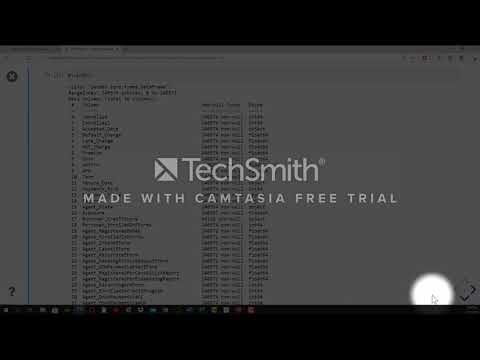

In [1]:
     from IPython.display import YouTubeVideo
YouTubeVideo('tsv76R8fqyo')

## TABLE OF CONTENT
#### BACKGROUND INFORMATION OF DATA
#### DATA CLEANING, TRANSFORMATION 
#### BUSINESS INTELLIGENCE ANALYSIS
#### EXPLORATORY DATA ANALYSIS (EDA)
#### CLASSIFICATION ANALYSIS / EVALUATION AND DEPLOYMENT
#### REGRESSION ANALYSIS / EVALUATION AND DEPLOYMENT
#### CLUSTER ANALYSIS
#### SUMMARY AND RECOMMENDATION

# BACKGROUND INFORMATION OF DATA

#### This dataset belongs to a Premium Financing Company which consists of 47 variables to figure out the cause of loan cancellations. Among these variables includes, APR, premium, terms of payment, down payment by borrowers, credit score, late charges, etc. Our focus is to find which variables has the most influence in relation to borrowers to cancelling their loans before the maturity date. In addition to that, we are to predict borrowers that are likely to cancel their loans in future by so doing we will be able to identify measure that will enable Premium Financing Company to implement in order to prevent such losses. 
#### Our first hypothesis is to investigate that, when the APR increases, the number of borrowers who cancelled their loans will increase and vice versa.
#### The second hypothesis after a careful research, the higher a premium which is as a result of higher risk score in connection with a lower or no credit sore of a borrower, has influence of borrowers cancelling their loans and vice versa. 

#### Extra variables were created and some were transformed for this project. Examples of such variables are Regions (which Region a borrowers is located), Amt_Interest (this is the amount to be financed plus the interest earned on the loan) and Cancelled1 were created. Transformed variables were credit score, risk score etc. 

# DATA CLEANING AND TRANSFORMATION

# Import python packages

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', 500)

# Load data

In [3]:
an=pd.read_csv("data/analysis.csv")
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
0,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,NaN,0
1,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,NaN,0
2,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,NaN,0
3,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,NaN,0
4,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,NaN,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,NaN,0


# Finding data information

In [4]:
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Cancelled                                  140574 non-null  int64  
 1   Accepted_Date                              140574 non-null  object 
 2   Default_Charge                             140574 non-null  float64
 3   Late_Charge                                140574 non-null  float64
 4   NSF_Charge                                 140574 non-null  float64
 5   Premium                                    140574 non-null  float64
 6   Down                                       140574 non-null  float64
 7   AmtFin                                     140574 non-null  float64
 8   APR                                        140574 non-null  float64
 9   Term                                       140574 non-null  int64  
 10  Mature_D

# How many missing values in each column or variable

In [5]:
an.isnull().sum()

Cancelled                                         0
Accepted_Date                                     0
Default_Charge                                    0
Late_Charge                                       0
NSF_Charge                                        0
Premium                                           0
Down                                              0
AmtFin                                            0
APR                                               0
Term                                              0
Mature_Date                                       0
Payments_Rcvd                                     0
Borrower_State                                    0
Region                                            0
Agent_State                                       0
Exposure                                          7
Borrower_CreditScore                          46356
Borrower_EnrolledInEForms                         0
Agent_RegisteredOnWeb                             3
Agent_Enroll

# Replace all null values with E where E represents the null

In [6]:
an = an.replace({'Risk_Score': np.NaN}, {'Risk_Score': 'E'})
an.head()



,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
0,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
1,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
3,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
4,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,NaN,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


# Replace all null values with 6 where 6 represents no score

In [7]:
an = an.replace({'Borrower_CreditScore': np.NaN}, {'Borrower_CreditScore': '6'})
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
0,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
1,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
3,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
4,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,6,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


In [8]:
an = an.replace({'Borrower_CreditScore': 'NS'}, {'Borrower_CreditScore': '6'})
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
0,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
1,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
3,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
4,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,6,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


# Handlingmissing values for Exposure, we find the median and replace it with the null value.

In [9]:
# find the median
an['Exposure'].median()

218.82

In [10]:
# fill the null values with the median
an = an.fillna({'Exposure': 218.82})

# Drop all other null values

In [11]:
an = an.dropna()
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
0,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
1,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
3,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
4,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,6,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


In [12]:
# finding out data types
an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140571 entries, 0 to 140573
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Cancelled                                  140571 non-null  int64  
 1   Accepted_Date                              140571 non-null  object 
 2   Default_Charge                             140571 non-null  float64
 3   Late_Charge                                140571 non-null  float64
 4   NSF_Charge                                 140571 non-null  float64
 5   Premium                                    140571 non-null  float64
 6   Down                                       140571 non-null  float64
 7   AmtFin                                     140571 non-null  float64
 8   APR                                        140571 non-null  float64
 9   Term                                       140571 non-null  int64  
 10  Mature_D

# How many missing values in each column or variable

In [13]:
an.isnull().sum()

Cancelled                                    0
Accepted_Date                                0
Default_Charge                               0
Late_Charge                                  0
NSF_Charge                                   0
Premium                                      0
Down                                         0
AmtFin                                       0
APR                                          0
Term                                         0
Mature_Date                                  0
Payments_Rcvd                                0
Borrower_State                               0
Region                                       0
Agent_State                                  0
Exposure                                     0
Borrower_CreditScore                         0
Borrower_EnrolledInEForms                    0
Agent_RegisteredOnWeb                        0
Agent_EnrolledInEForms                       0
Agent_IntentEForm                            0
Agent_CancelE

# Exploratory Analysis

In [14]:
an.describe()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Payments_Rcvd,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,RecurringACH_TF
count,140571.000000,140571.000000,140571.00000,140571.000000,1.405710e+05,1.405710e+05,1.405710e+05,140571.000000,140571.000000,140571.000000,1.405710e+05,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000,140571.000000
mean,0.089727,1.215855,116.38754,1.358755,2.337847e+04,4.596994e+03,1.878148e+04,12.300391,9.478143,8.437402,2.276704e+03,0.302915,0.988924,0.740266,0.590349,0.642501,0.642501,0.642501,0.642978,0.116283,0.368696,0.891087,0.799738,0.446884,0.446884,0.260751,0.309274,0.716279,0.008914
std,0.285791,5.881939,722.78867,9.103261,1.206833e+05,2.687529e+04,1.004240e+05,4.533700,1.440705,2.841433,2.482535e+04,0.459520,0.104660,0.438490,0.491771,0.479265,0.479265,0.479265,0.479123,0.320565,0.482453,0.311531,0.400198,0.497173,0.497173,0.439046,0.462196,0.450805,0.093991
min,0.000000,0.000000,-110.60000,0.000000,2.050000e+02,0.000000e+00,3.395000e+01,0.000000,1.000000,0.000000,-4.497573e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,2.138000e+03,4.777000e+02,1.599050e+03,8.750000,9.000000,9.000000,2.990000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,5.070780e+03,1.108250e+03,3.912300e+03,12.250000,10.000000,10.000000,2.188200e+02,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,49.46000,0.000000,1.441951e+04,3.000000e+03,1.129482e+04,15.350000,10.000000,10.000000,8.153300e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,635.770000,72686.20000,1350.000000,1.486929e+07,2.650548e+06,1.361670e+07,41.000000,36.000000,24.000000,6.865997e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Business Intelligence and Data Visualisation 

# Indexing

In [15]:
an.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            140564, 140565, 140566, 140567, 140568, 140569, 140570, 140571,
            140572, 140573],
           dtype='int64', length=140571)

In [16]:
an = an.set_index(pd.DatetimeIndex(an['Mature_Date']))
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
Mature_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-12,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
2015-11-16,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2015-11-22,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
2015-10-27,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
2015-10-26,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,6,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


# Pivot talbe for cancelled to find the number of borrowers who cancelled. We have 12613 borrowers cancelling their loans.

In [17]:
an.groupby(['Cancelled']).size()

Cancelled
0    127958
1     12613
dtype: int64

<AxesSubplot:xlabel='Cancelled'>

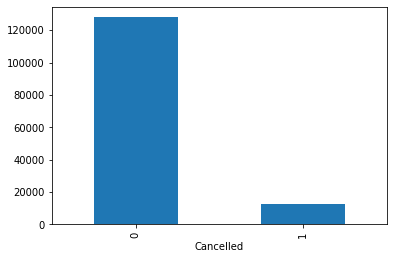

In [18]:
# plot for cancelled
an.groupby(['Cancelled']).size().plot(kind='bar')

# Relationship between loan cancellation and exposure. There is a negative relationship.

C:\Users\Nana Tieku\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exposure', ylabel='Cancelled'>

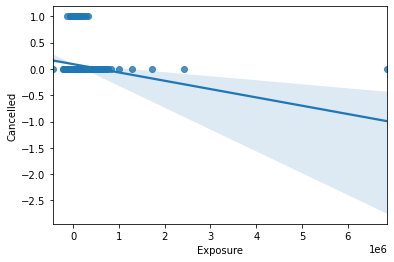

In [19]:
sns.regplot('Exposure', 'Cancelled', an)

# Relationship between loan cancellation and premium. There is a negative relationship.

C:\Users\Nana Tieku\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Premium', ylabel='Cancelled'>

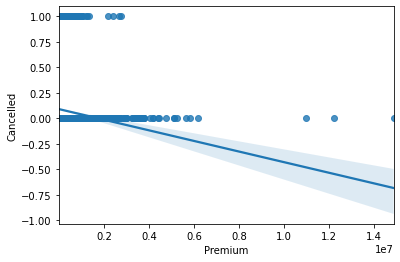

In [20]:
sns.regplot('Premium', 'Cancelled', an)

# Relationship between APR and Cancelled. We can see that, there is a positive relationship. As APR increases, cancellation increases.

C:\Users\Nana Tieku\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='APR', ylabel='Cancelled'>

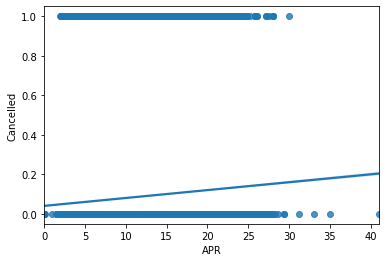

In [21]:
sns.regplot('APR', 'Cancelled', an)

# Plot for the Region with the highest premium. We have Southwest having the highest total in terms of premium

In [22]:
an.groupby('Region')['Premium'].sum().sort_values(ascending=False).head()

Region
Southwest    1.890151e+09
Southeast    1.184925e+09
Midwest      8.163970e+07
Northeast    6.558344e+07
West         6.378470e+07
Name: Premium, dtype: float64

# Plot for the Region with the highest premium on a bar chart.

<AxesSubplot:xlabel='Region'>

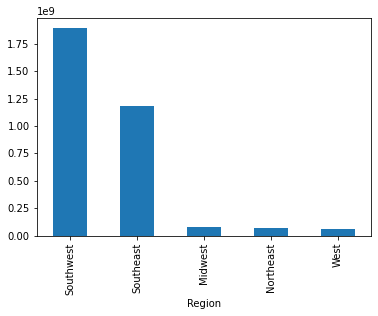

In [23]:
an.groupby('Region')['Premium'].sum().sort_values(ascending=False).head().plot(kind='bar')

# Plot for the state with the highest premium. We have Texas having the highest total premium.

In [24]:
an.groupby('Borrower_State')['Premium'].sum().sort_values(ascending=False).head()

Borrower_State
TX    1.785700e+09
LA    7.226075e+08
MS    1.826859e+08
OK    8.621839e+07
FL    5.053568e+07
Name: Premium, dtype: float64

# Plot for the state with the highest premium represented on a bar chart

<AxesSubplot:xlabel='Borrower_State'>

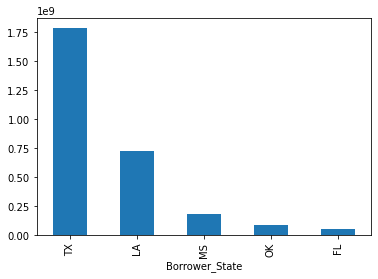

In [25]:
an.groupby('Borrower_State')['Premium'].sum().sort_values(ascending=False).head().plot(kind='bar')

# The industry that had the highest premium. We have Services being the industry with the highest premium.

In [26]:
an.groupby('Borrower_Classification')['Premium'].sum().sort_values(ascending=False).head(1)

Borrower_Classification
Services    9.253794e+08
Name: Premium, dtype: float64

# Plot for the highest premium in terms of industry

<AxesSubplot:xlabel='Borrower_Classification'>

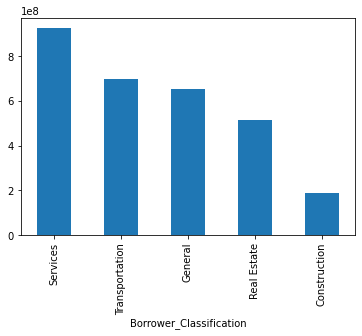

In [27]:
an.groupby('Borrower_Classification')['Premium'].sum().sort_values(ascending=False).head().plot(kind='bar')

# Finding how many borrowers in each Region who cancelled the loan and did not. We have Southeast having the highest number for both people who cancelled and those who did not with number of borrowers being 67566 and 6265 respectively.

In [28]:
an.groupby(['Region', 'Cancelled']).size().sort_values(ascending=False).head()

Region     Cancelled
Southeast  0            67566
Southwest  0            53706
Southeast  1             6265
Southwest  1             5946
Midwest    0             3567
dtype: int64

<AxesSubplot:ylabel='None'>

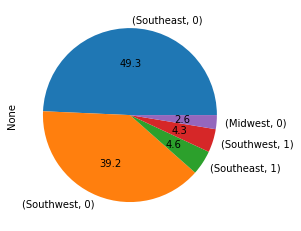

In [29]:
an.groupby(['Region', 'Cancelled']).size().sort_values(ascending=False).head().plot(kind='pie', autopct='%.1f')

# Finding how many borrowers in each state who cancelled the loan and did not. We have Texas having the highest number for both people who cancelled and those who did not with number of borrowers being 52085 and 5803 respectively.

In [30]:
an.groupby(['Borrower_State', 'Cancelled']).size().sort_values(ascending=False).head()

Borrower_State  Cancelled
TX              0            52085
LA              0            40012
MS              0            14495
TX              1             5803
LA              1             3654
dtype: int64

<AxesSubplot:ylabel='None'>

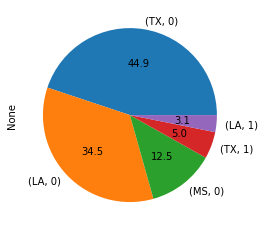

In [31]:
an.groupby(['Borrower_State', 'Cancelled']).size().sort_values(ascending=False).head().plot(kind='pie', autopct='%.1f')

# Cancellation of loan based on industrial classification. we have Services leading the pack with number of borrowers 43220 who did not cancel their loans and the General industry recording 3335 for those borrowers who cancelled.

In [32]:
an.groupby(['Borrower_Classification', 'Cancelled']).size().sort_values(ascending=False)

Borrower_Classification  Cancelled
Services                 0            43220
General                  0            29242
Real Estate              0            24226
Transportation           0            13251
Construction             0             8065
Retail Trade             0             4278
General                  1             3335
Services                 1             2939
Transportation           1             2476
Real Estate              1             1800
Agriculture              0             1505
Manufacturing            0             1365
Mining                   0             1282
Wholesale Trade          0             1093
Construction             1             1025
Retail Trade             1              496
Government               0              431
Agriculture              1              151
Mining                   1              141
Manufacturing            1              119
Wholesale Trade          1               99
Government               1               

# Cancellation of loan based on industrial classification with a bar chart.

<AxesSubplot:xlabel='Borrower_Classification,Cancelled'>

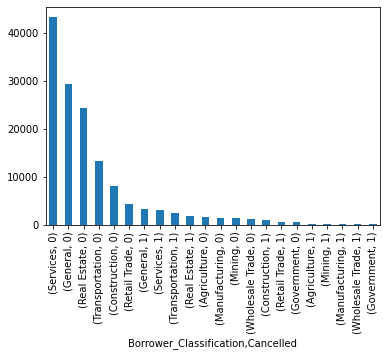

In [33]:
an.groupby(['Borrower_Classification', 'Cancelled']).size().sort_values(ascending=False).plot(kind='bar')

### From the above bar chart, borrowers in the General industry had the highest cancellations.  

# Identifying how many borrowers who cancelled the loan in relation to their credit score. We have borrowers who had no credit score recording the highest cancellation with numbers 7193. 

In [34]:
an.groupby(['Borrower_CreditScore', 'Cancelled']).size().sort_values(ascending=False)

Borrower_CreditScore  Cancelled
6                     0            46851
2                     0            23926
3                     0            20635
1                     0            17785
5                     0             9448
6                     1             7193
4                     0             6036
0                     0             3277
3                     1             1635
5                     1             1301
2                     1             1055
4                     1              743
1                     1              373
0                     1              313
dtype: int64

<AxesSubplot:xlabel='Borrower_CreditScore,Cancelled'>

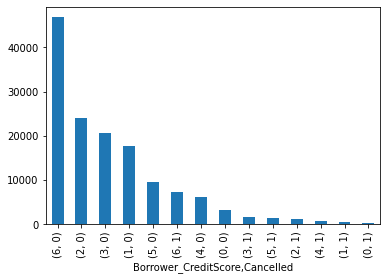

In [35]:
an.groupby(['Borrower_CreditScore', 'Cancelled']).size().sort_values(ascending=False).plot(kind='bar')

### From the above visualisation, we can see borrowers who had no credit score having the highest cancellation

# Relationship between cancelled and APR. There is a positive relationship between cancellation and APR.

C:\Users\Nana Tieku\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='APR', ylabel='Cancelled'>

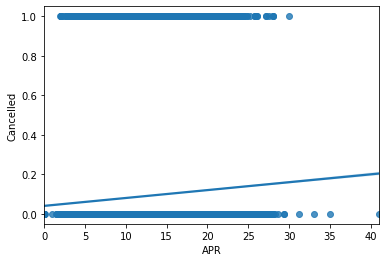

In [36]:
 sns.regplot('APR', 'Cancelled', an)

# Identifying how many borrowers who cancelled the loan in relation to their Payments_Rcvd. Borrowers who made zero payment had the highest number of cancellation (2410).

In [37]:
an.groupby(['Payments_Rcvd', 'Cancelled']).size().sort_values(ascending=False)

Payments_Rcvd  Cancelled
10             0            60343
9              0            36798
11             0            11273
3              0             4444
8              0             3233
0              0             2797
               1             2410
7              0             2343
6              0             1793
2              1             1620
1              1             1525
5              0             1427
4              0             1351
3              1             1265
4              1             1211
5              1             1114
2              0             1084
6              1             1067
1              0             1011
7              1              941
8              1              858
9              1              488
10             1              101
12             0               15
11             1               12
15             0                9
20             0                7
18             0                6
13             0       

### We have 2410 borrowers who did no payments and did cancel the loan

<AxesSubplot:xlabel='Payments_Rcvd,Cancelled'>

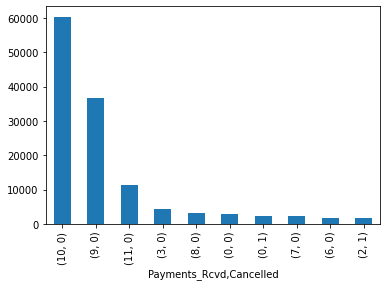

In [38]:
an.groupby(['Payments_Rcvd', 'Cancelled']).size().sort_values(ascending=False).head(10).plot(kind='bar')

### We have (0, 1) when 0 represents no payments and 1 represents cancellation. Borrowers with zero payments cancelled the loans the most.

# Identifying how many borrowers who cancelled the loan in relation to their Term top 5

In [39]:
an.groupby(['Term', 'Cancelled']).size().sort_values(ascending=False).head()

Term  Cancelled
10    0            67591
9     0            40920
11    0            12547
10    1             6501
9     1             4599
dtype: int64

### People or borrowers who have 10 terms of payment having the highest cancellations with 6501.

# Identifying how many borrowers who cancelled the loan in relation to their Term

<AxesSubplot:xlabel='Term,Cancelled'>

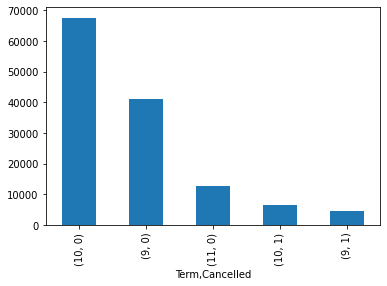

In [40]:
an.groupby(['Term', 'Cancelled']).size().sort_values(ascending=False).head().plot(kind='bar')

### People or borrowers who have 10 terms of payment having the highest cancellations.

# Identifying how many borrowers who cancelled the loan in relation to their Risk Score top 10

In [41]:
an.groupby(['Risk_Score', 'Cancelled']).size().sort_values(ascending=False).head(10)

Risk_Score  Cancelled
E           0            91234
A           0            15688
C           0             9850
B           0             9819
E           1             9174
C           1             1878
D           0             1367
B           1              970
A           1              508
D           1               83
dtype: int64

#### E representing the worst score had the highest cancellations thus 9174

<AxesSubplot:xlabel='Risk_Score,Cancelled'>

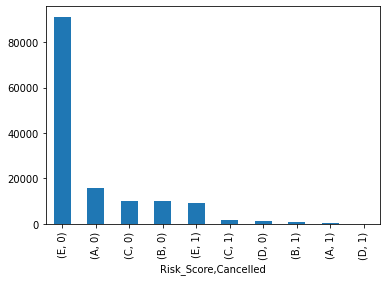

In [42]:
# identifying how many borrowers who cancelled the loan in relation to their Risk score
an.groupby(['Risk_Score', 'Cancelled']).size().sort_values(ascending=False).plot(kind='bar')

# Quarterly premium by maturity date. 1st Quarter of 2018 had the highest premium.

In [43]:
an.Premium.resample('Q').size()

Mature_Date
2014-12-31        1
2015-03-31        5
2015-06-30       65
2015-09-30      553
2015-12-31     9331
2016-03-31    11961
2016-06-30    11470
2016-09-30    10560
2016-12-31    11319
2017-03-31    11821
2017-06-30    12022
2017-09-30    11119
2017-12-31    11681
2018-03-31    12663
2018-06-30    12021
2018-09-30    10740
2018-12-31     3226
2019-03-31        9
2019-06-30        3
2019-09-30        1
Freq: Q-DEC, Name: Premium, dtype: int64

<AxesSubplot:xlabel='Mature_Date'>

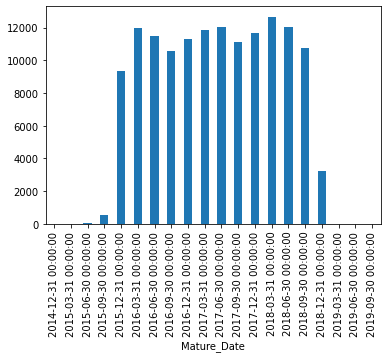

In [44]:
# Bar representation of premium on quarterly
an.Premium.resample('Q').size().plot(kind='bar')

# Yearly cancellation by maturity date. We have 2017 having the highest cancellation.

In [45]:
an.Cancelled.resample('Y').size()

Mature_Date
2014-12-31        1
2015-12-31     9954
2016-12-31    45310
2017-12-31    46643
2018-12-31    38650
2019-12-31       13
Freq: A-DEC, Name: Cancelled, dtype: int64

<AxesSubplot:xlabel='Mature_Date'>

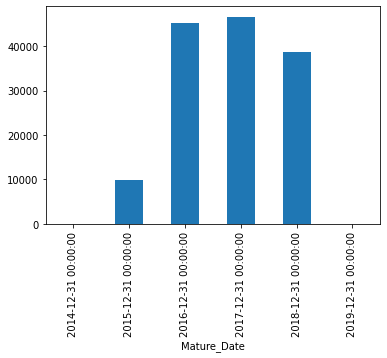

In [46]:
# Bar representation 
an.Cancelled.resample('Y').size().plot(kind='bar')

# Indexing for Acceptance Date

In [47]:
an.index

DatetimeIndex(['2015-10-12', '2015-11-16', '2015-11-22', '2015-10-27',
               '2015-10-26', '2015-08-28', '2015-11-20', '2015-12-21',
               '2015-12-26', '2016-01-02',
               ...
               '2018-10-11', '2018-10-01', '2018-11-07', '2018-10-13',
               '2018-09-12', '2018-08-21', '2018-08-13', '2018-07-12',
               '2018-10-27', '2018-09-21'],
              dtype='datetime64[ns]', name='Mature_Date', length=140571, freq=None)

In [48]:
an = an.set_index(pd.DatetimeIndex(an['Accepted_Date']))
an.head()

,Cancelled,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,APR,Term,Mature_Date,Payments_Rcvd,Borrower_State,Region,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Risk_Score,RecurringACH_TF
Accepted_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-06,0,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,19.95,9,10/12/2015,9,CA,West,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Services,E,0
2015-01-23,0,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,10.65,10,11/16/2015,10,TX,Southwest,TX,442.96,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Real Estate,E,0
2015-01-23,0,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,14.00,10,11/22/2015,10,TX,Southwest,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,1,Transportation,E,0
2015-01-26,0,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,14.50,9,10/27/2015,9,NC,Southeast,TX,0.00,6,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,0,0,General,E,0
2015-02-09,0,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,23.95,9,10/26/2015,9,TX,Southwest,TX,0.00,6,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,1,1,Construction,E,0


# Monthly cancellation by acceptance date. We have April 2017 having the highest cancellation and November 2015 having the lowest.

<AxesSubplot:xlabel='Accepted_Date'>

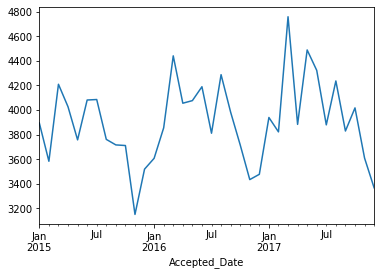

In [49]:
an.Cancelled.resample('M').size().plot()

In [50]:
# Bar chart representation on monthly bases.
an.Cancelled.resample('M').size()

Accepted_Date
2015-01-31    3894
2015-02-28    3583
2015-03-31    4209
2015-04-30    4026
2015-05-31    3757
2015-06-30    4081
2015-07-31    4085
2015-08-31    3761
2015-09-30    3716
2015-10-31    3711
2015-11-30    3151
2015-12-31    3519
2016-01-31    3607
2016-02-29    3855
2016-03-31    4440
2016-04-30    4055
2016-05-31    4076
2016-06-30    4189
2016-07-31    3811
2016-08-31    4287
2016-09-30    3982
2016-10-31    3716
2016-11-30    3434
2016-12-31    3477
2017-01-31    3939
2017-02-28    3822
2017-03-31    4758
2017-04-30    3883
2017-05-31    4488
2017-06-30    4322
2017-07-31    3879
2017-08-31    4236
2017-09-30    3829
2017-10-31    4017
2017-11-30    3609
2017-12-31    3367
Freq: M, Name: Cancelled, dtype: int64

# Yearly cancellation by acceptance date. We have 2017 having the highest.

<AxesSubplot:xlabel='Accepted_Date'>

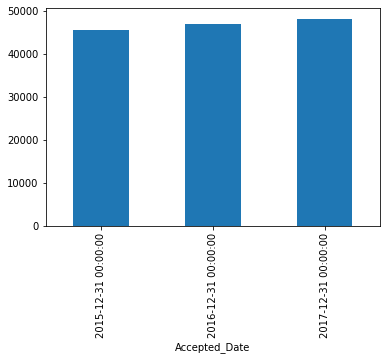

In [51]:
an.Cancelled.resample('Y').size().plot(kind='bar')

In [52]:
an.Cancelled.resample('Y').size()

Accepted_Date
2015-12-31    45493
2016-12-31    46929
2017-12-31    48149
Freq: A-DEC, Name: Cancelled, dtype: int64

# Quarterly premium by acceptance date. We have 2017 2nd Quarter having the highest premium.

<AxesSubplot:xlabel='Accepted_Date'>

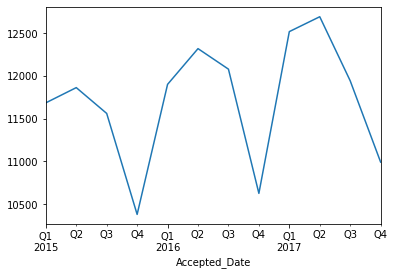

In [53]:
an.Premium.resample('Q').size().plot()

In [54]:
an.Premium.resample('Q').size()

Accepted_Date
2015-03-31    11686
2015-06-30    11864
2015-09-30    11562
2015-12-31    10381
2016-03-31    11902
2016-06-30    12320
2016-09-30    12080
2016-12-31    10627
2017-03-31    12519
2017-06-30    12693
2017-09-30    11944
2017-12-31    10993
Freq: Q-DEC, Name: Premium, dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

### Read data

In [55]:
ex=pd.read_csv("data/Classification.csv")
ex.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,NaN,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,NaN,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,NaN,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,NaN,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,NaN,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


# Identifying data type

In [56]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Cancelled                            140574 non-null  int64  
 1   Default_Charge                       140574 non-null  float64
 2   Late_Charge                          140574 non-null  float64
 3   NSF_Charge                           140574 non-null  float64
 4   Premium                              140574 non-null  float64
 5   Down                                 140574 non-null  float64
 6   APR                                  140574 non-null  float64
 7   Term                                 140574 non-null  int64  
 8   Region                               140574 non-null  object 
 9   Payments_Rcvd                        140574 non-null  int64  
 10  Borrower_CreditScore                 94218 non-null   object 
 11  Borrower_Clas

# How many missing values in each column or variable

In [57]:
ex.isnull().sum()

Cancelled                                  0
Default_Charge                             0
Late_Charge                                0
NSF_Charge                                 0
Premium                                    0
Down                                       0
APR                                        0
Term                                       0
Region                                     0
Payments_Rcvd                              0
Borrower_CreditScore                   46356
Borrower_Classification                    0
RecurringACH_TF                            0
Exposure                                   7
Borrower_EnrolledInEForms                  0
Agent_RegisteredOnWeb                      3
Agent_EnrolledInEForms                     3
Agent_IntentEForm                          3
Agent_RegisteredForCancelListReport        3
Agent_RegisteredForEimpendingReport        3
Agent_EnrolledInCreditProgram              0
Borrower_RegisteredOnWeb                   0
dtype: int

### Replacing all null values with E where E represents no score.

In [58]:
ex = ex.replace({'Risk_Score': np.NaN}, {'Risk_Score': 'E'})
ex.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,NaN,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,NaN,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,NaN,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,NaN,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,NaN,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


### Replace all null values with 6 where 6 represents the null therefore NS and 6 means no score.

In [59]:
ex = ex.replace({'Borrower_CreditScore': np.NaN}, {'Borrower_CreditScore': '6'})
ex.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,6,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,6,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,6,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,6,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,6,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


In [60]:
ex = ex.replace({'Borrower_CreditScore': 'NS'}, {'Borrower_CreditScore': '6'})
ex.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,6,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,6,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,6,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,6,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,6,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


### Handlingmissing values for Exposure, we find the median and replace it with the null value.

In [61]:
ex['Exposure'].median()

218.82

In [62]:
ex = ex.fillna({'Exposure': 218.82})

### Looking for missing values in each column or variable

In [63]:
ex.isnull().sum()

Cancelled                              0
Default_Charge                         0
Late_Charge                            0
NSF_Charge                             0
Premium                                0
Down                                   0
APR                                    0
Term                                   0
Region                                 0
Payments_Rcvd                          0
Borrower_CreditScore                   0
Borrower_Classification                0
RecurringACH_TF                        0
Exposure                               0
Borrower_EnrolledInEForms              0
Agent_RegisteredOnWeb                  3
Agent_EnrolledInEForms                 3
Agent_IntentEForm                      3
Agent_RegisteredForCancelListReport    3
Agent_RegisteredForEimpendingReport    3
Agent_EnrolledInCreditProgram          0
Borrower_RegisteredOnWeb               0
dtype: int64

### Dropping null values

In [64]:
ex = ex.dropna()
ex.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,6,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,6,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,6,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,6,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,6,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


### Identifying missing variables 

In [65]:
ex.isnull().sum()

Cancelled                              0
Default_Charge                         0
Late_Charge                            0
NSF_Charge                             0
Premium                                0
Down                                   0
APR                                    0
Term                                   0
Region                                 0
Payments_Rcvd                          0
Borrower_CreditScore                   0
Borrower_Classification                0
RecurringACH_TF                        0
Exposure                               0
Borrower_EnrolledInEForms              0
Agent_RegisteredOnWeb                  0
Agent_EnrolledInEForms                 0
Agent_IntentEForm                      0
Agent_RegisteredForCancelListReport    0
Agent_RegisteredForEimpendingReport    0
Agent_EnrolledInCreditProgram          0
Borrower_RegisteredOnWeb               0
dtype: int64

# Correlation before getting dummies
### We going to the correlation that is the relationship between canclled and some other variables as well as relationship between premium and other variables.

In [66]:
ex.corr()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
Cancelled,1.000000,0.208639,0.003211,0.055171,-0.021947,-0.017743,0.063313,-0.007633,-0.543544,-0.014414,-0.013718,-0.056426,-0.028611,-0.018221,-0.014632,0.020447,-0.010699,0.040983,-0.148420
Default_Charge,0.208639,1.000000,0.034682,0.097183,-0.019586,-0.016531,0.082820,-0.009361,-0.091710,-0.011853,-0.011417,-0.022523,-0.003908,0.008845,-0.014734,-0.004638,-0.032150,0.024827,-0.037235
Late_Charge,0.003211,0.034682,1.000000,0.083832,0.292346,0.221038,-0.157939,0.031260,0.046404,-0.014259,0.157451,0.052312,-0.015040,-0.023173,-0.017997,0.009092,0.010678,0.024667,0.064623
NSF_Charge,0.055171,0.097183,0.083832,1.000000,0.005790,0.006307,-0.011229,0.014434,0.003683,0.006538,0.001125,0.029768,-0.010106,-0.004835,-0.005381,0.012153,0.012421,-0.009755,0.005445
Premium,-0.021947,-0.019586,0.292346,0.005790,1.000000,0.801898,-0.237255,0.039529,0.047459,-0.009706,0.722927,0.028928,-0.034817,-0.044899,-0.025628,0.021743,0.012115,0.042008,0.027041
Down,-0.017743,-0.016531,0.221038,0.006307,0.801898,1.000000,-0.195005,0.007759,0.025032,-0.008191,0.333415,0.019468,-0.029185,-0.034633,-0.018939,0.020340,0.008859,0.044974,0.016229
APR,0.063313,0.082820,-0.157939,-0.011229,-0.237255,-0.195005,1.000000,-0.125364,-0.148426,0.030607,-0.130214,-0.106369,-0.008099,0.093056,-0.036760,0.047823,-0.050178,-0.079922,-0.085871
Term,-0.007633,-0.009361,0.031260,0.014434,0.039529,0.007759,-0.125364,1.000000,0.481009,0.006351,0.037965,0.042511,0.021677,0.034126,0.000521,-0.014999,0.011236,-0.076261,0.056280
Payments_Rcvd,-0.543544,-0.091710,0.046404,0.003683,0.047459,0.025032,-0.148426,0.481009,1.000000,0.021335,0.036034,0.069080,0.030453,0.026116,0.012075,-0.024717,0.012036,-0.076571,0.159380
RecurringACH_TF,-0.014414,-0.011853,-0.014259,0.006538,-0.009706,-0.008191,0.030607,0.006351,0.021335,1.000000,-0.005468,-0.031221,-0.005150,0.010951,0.008818,-0.001819,-0.009095,0.021925,-0.032016


#### Our correlation analysis shows a negative relationship between cancelled and down payment. This means that as down payment increases cancelled decrease.
#### The relationship between premium and APR is a negative one.That is as premium increases, APR decreases and vice versa.
#### Terms of payment has a negative relationship with cancelled. Thus, as cancelled increases, terms of payment decreases.
#### Premium has a positive relationship with Exposure.
#### Credit score has a negative relationship with premium. A high cresit score means a low premium.
#### Cancelled has a negative relationship with premium. A high premium means a decrease in cancelled. 

### Looking for the number of uniqueness in the variables

In [67]:
ex.nunique()

Cancelled                                  2
Default_Charge                           416
Late_Charge                            26323
NSF_Charge                               235
Premium                                89309
Down                                   92126
APR                                     2556
Term                                      24
Region                                     6
Payments_Rcvd                             24
Borrower_CreditScore                       7
Borrower_Classification                   11
RecurringACH_TF                            2
Exposure                               74666
Borrower_EnrolledInEForms                  2
Agent_RegisteredOnWeb                      2
Agent_EnrolledInEForms                     2
Agent_IntentEForm                          2
Agent_RegisteredForCancelListReport        2
Agent_RegisteredForEimpendingReport        2
Agent_EnrolledInCreditProgram              2
Borrower_RegisteredOnWeb                   2
dtype: int

# Looking for data types

In [68]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140571 entries, 0 to 140573
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Cancelled                            140571 non-null  int64  
 1   Default_Charge                       140571 non-null  float64
 2   Late_Charge                          140571 non-null  float64
 3   NSF_Charge                           140571 non-null  float64
 4   Premium                              140571 non-null  float64
 5   Down                                 140571 non-null  float64
 6   APR                                  140571 non-null  float64
 7   Term                                 140571 non-null  int64  
 8   Region                               140571 non-null  object 
 9   Payments_Rcvd                        140571 non-null  int64  
 10  Borrower_CreditScore                 140571 non-null  object 
 11  Borrower_Clas

### Getting dummies

In [69]:
exx = pd.get_dummies(ex, columns=['Cancelled', 'Borrower_CreditScore', 'Borrower_Classification', 'Region', 'RecurringACH_TF'])
exx.head()


,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Cancelled_0,Cancelled_1,Borrower_CreditScore_0,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_3,Borrower_CreditScore_4,Borrower_CreditScore_5,Borrower_CreditScore_6,Borrower_Classification_Agriculture,Borrower_Classification_Construction,Borrower_Classification_General,Borrower_Classification_Government,Borrower_Classification_Manufacturing,Borrower_Classification_Mining,Borrower_Classification_Real Estate,Borrower_Classification_Retail Trade,Borrower_Classification_Services,Borrower_Classification_Transportation,Borrower_Classification_Wholesale Trade,Region_Canada,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,RecurringACH_TF_0,RecurringACH_TF_1
0,0.0,0.00,0.0,2078.00,737.00,19.95,9,9,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,0.0,0.00,0.0,12033.18,3167.00,10.65,10,10,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0.0,0.00,0.0,13650.94,3655.73,14.00,10,10,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0.0,0.00,0.0,8782.00,2533.00,14.50,9,9,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,25.45,30.0,1259.00,427.25,23.95,9,9,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Correlation Analysis for dataset with dummies
#### We are going to the correlation that is the relationship between canclled and some other variables as well as relationship between premium and other variables.¶

In [70]:
exx.corr()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Cancelled_0,Cancelled_1,Borrower_CreditScore_0,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_3,Borrower_CreditScore_4,Borrower_CreditScore_5,Borrower_CreditScore_6,Borrower_Classification_Agriculture,Borrower_Classification_Construction,Borrower_Classification_General,Borrower_Classification_Government,Borrower_Classification_Manufacturing,Borrower_Classification_Mining,Borrower_Classification_Real Estate,Borrower_Classification_Retail Trade,Borrower_Classification_Services,Borrower_Classification_Transportation,Borrower_Classification_Wholesale Trade,Region_Canada,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,RecurringACH_TF_0,RecurringACH_TF_1
Default_Charge,1.000000,0.034682,0.097183,-0.019586,-0.016531,0.082820,-0.009361,-0.091710,-0.011417,-0.022523,-0.003908,0.008845,-0.014734,-0.004638,-0.032150,0.024827,-0.037235,-0.208639,0.208639,0.005384,-0.054376,-0.037759,-0.003134,-0.015383,0.022485,0.062258,0.007557,0.009430,-0.006273,-0.000186,-0.005155,-0.008580,0.026597,0.013287,-0.018595,-0.009785,-0.000126,0.009195,-0.004516,-0.008476,0.165377,-0.167539,0.016960,0.011853,-0.011853
Late_Charge,0.034682,1.000000,0.083832,0.292346,0.221038,-0.157939,0.031260,0.046404,0.157451,0.052312,-0.015040,-0.023173,-0.017997,0.009092,0.010678,0.024667,0.064623,-0.003211,0.003211,0.010747,-0.022276,0.008788,0.013578,0.014721,0.089102,-0.060382,0.002712,0.000187,-0.016464,0.007362,0.004860,0.024693,-0.030226,-0.011977,-0.016790,0.080049,-0.002405,-0.000901,-0.003647,0.001790,-0.036249,0.036965,0.002158,0.014259,-0.014259
NSF_Charge,0.097183,0.083832,1.000000,0.005790,0.006307,-0.011229,0.014434,0.003683,0.001125,0.029768,-0.010106,-0.004835,-0.005381,0.012153,0.012421,-0.009755,0.005445,-0.055171,0.055171,0.002045,-0.039670,-0.029496,-0.000966,0.025247,0.039455,0.017918,-0.006374,-0.003510,-0.001247,-0.001284,-0.005415,-0.005063,-0.021308,-0.004095,-0.018143,0.066506,-0.002341,0.004116,-0.004663,0.000777,-0.044555,0.047730,-0.006934,-0.006538,0.006538
Premium,-0.019586,0.292346,0.005790,1.000000,0.801898,-0.237255,0.039529,0.047459,0.722927,0.028928,-0.034817,-0.044899,-0.025628,0.021743,0.012115,0.042008,0.027041,0.021947,-0.021947,0.001280,0.020448,0.053412,0.015635,0.000938,0.036414,-0.088525,-0.004439,-0.005481,-0.015296,0.002463,0.008752,0.048603,-0.014538,-0.014958,-0.019298,0.061970,0.002890,-0.001068,-0.001890,0.012605,-0.063877,0.059106,0.015118,0.009706,-0.009706
Down,-0.016531,0.221038,0.006307,0.801898,1.000000,-0.195005,0.007759,0.025032,0.333415,0.019468,-0.029185,-0.034633,-0.018939,0.020340,0.008859,0.044974,0.016229,0.017743,-0.017743,0.006268,0.010241,0.042015,0.011718,0.000305,0.035899,-0.070649,-0.003784,-0.000440,-0.012076,0.002394,0.005392,0.041594,-0.002565,-0.013110,-0.022874,0.045800,0.004750,-0.000847,-0.004076,0.013148,-0.057764,0.052069,0.021889,0.008191,-0.008191
APR,0.082820,-0.157939,-0.011229,-0.237255,-0.195005,1.000000,-0.125364,-0.148426,-0.130214,-0.106369,-0.008099,0.093056,-0.036760,0.047823,-0.050178,-0.079922,-0.085871,-0.063313,0.063313,0.015430,-0.105676,-0.129573,-0.038144,-0.018927,-0.059134,0.238943,-0.010867,-0.009576,0.032646,-0.013726,-0.030845,-0.074302,0.101498,0.006999,-0.005513,-0.111889,-0.018575,0.004391,0.059456,0.030361,0.221366,-0.247826,-0.009862,-0.030607,0.030607
Term,-0.009361,0.031260,0.014434,0.039529,0.007759,-0.125364,1.000000,0.481009,0.037965,0.042511,0.021677,0.034126,0.000521,-0.014999,0.011236,-0.076261,0.056280,0.007633,-0.007633,-0.014039,0.031813,0.054826,0.024189,0.015112,0.036092,-0.104992,-0.007267,0.009149,0.000018,0.004535,0.014612,0.016012,-0.052581,0.009224,0.018878,0.014227,0.006250,-0.000233,0.017496,-0.015141,-0

#### Our correlation analysis shows a high positive relationship between those who did not cancel the loan but a negative relationship between those who cancelled and down payment. This means that as down payment increases those who cancelled decrease but borrowers who did not cancel the loan increases.
#### The relationship between  those who did not cancel and APR is a negative one but for those who cancelled their loans has a positive relationship with APR.That is as APR increases, the number of borrowers who cancelled their loans increase whiles those who did not cancel their loans decreases and vice versa.
#### Terms of payment has a positive relationship with premium. Thus, as premium increases, terms of payment increases.
#### Premium has a positive relationship with Exposure.
#### Credit score has a negative relationship with premium. A high cresit score means a low premium.
#### Borrowers who live in Canada has a positive relationship to not cancelling of loan thus borrowers in canada do not cancel . A high premium means a interest earned on the loan.

# Statistical inference

In [71]:
import pingouin as pg

### T-test for clients who cancelled or not in relation to APR if their mean values are the same

In [72]:
no = ex[ex['Cancelled'] == 0]['APR']
yes = ex[ex['Cancelled'] == 1]['APR']

pg.ttest(no, yes, correction=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-23.785446,140569,two-sided,8.352213e-125,"[-1.09, -0.92]",0.221981,3.859e+120,1.0


In [73]:
# correlation between cancelled and APR
ex[['Cancelled','APR']].corr()


,Cancelled,APR
Cancelled,1.000000,0.063313
APR,0.063313,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a low p-value, we failed to accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of APR.

### T-test for clients who cancelled or not in relation to premium if their mean values are the same

In [74]:
no = ex[ex['Cancelled'] == 0]['Term']
yes = ex[ex['Cancelled'] == 1]['Term']

pg.ttest(no, yes, correction=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.862071,140569,two-sided,0.004209,"[0.01, 0.06]",0.026711,0.632,0.816496


In [75]:
# correlation between cancelled and APR
ex[['Cancelled','Term']].corr()

,Cancelled,Term
Cancelled,1.000000,-0.007633
Term,-0.007633,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a low p-value, we failed to accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of the number of terms of payment.

### Comparing two groups that is those who cancelled and those who did not in relation to NSF_Charge if their mean values are the same

In [76]:
no = ex[ex['Cancelled'] == 0]['NSF_Charge']
yes = ex[ex['Cancelled'] == 1]['NSF_Charge']

stats.ttest_ind(no, yes)   #using scipy package

Ttest_indResult(statistic=-20.716620971814795, pvalue=3.4068603534290835e-95)

In [77]:
# correlation between cancelled and APR
ex[['Cancelled','NSF_Charge']].corr()

,Cancelled,NSF_Charge
Cancelled,1.000000,0.055171
NSF_Charge,0.055171,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a low p-value, we failed to accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of NFS_Charge.

### Comparing two groups that is those who cancelled and those who did not in relation to Exposure if their mean values are the same

In [78]:
no = ex[ex['Cancelled'] == 0]['Exposure']
yes = ex[ex['Cancelled'] == 1]['Exposure']

stats.ttest_ind(no, yes)   #using scipy package

Ttest_indResult(statistic=5.143854288221026, pvalue=2.695186200754582e-07)

In [79]:
# correlation between cancelled and APR
ex[['Cancelled','Exposure']].corr()

,Cancelled,Exposure
Cancelled,1.000000,-0.013718
Exposure,-0.013718,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a low p-value, we failed to accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of Exposure.

### Comparing two groups that is those who cancelled and those who did not in relation to Region_Southwest if their mean values are the same

In [80]:
no = exx[exx['Cancelled_1'] == 0]['Region_Southwest']
yes = exx[exx['Cancelled_1'] == 1]['Region_Southwest']

stats.ttest_ind(no, yes)   #using scipy package

Ttest_indResult(statistic=-11.21388078381832, pvalue=3.5866382339547934e-29)

In [81]:
# correlation between cancelled and APR
exx[['Cancelled_1','Region_Southwest']].corr()

,Cancelled_1,Region_Southwest
Cancelled_1,1.000000,0.029896
Region_Southwest,0.029896,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a low p-value, we failed to accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of Region_Southwest.

### Comparing two groups that is those who cancelled and those who did not in relation to Region_West if their mean values are the same

In [82]:
no = exx[exx['Cancelled_1'] == 0]['Region_West']
yes = exx[exx['Cancelled_1'] == 1]['Region_West']

stats.ttest_ind(no, yes)   #using scipy package

Ttest_indResult(statistic=-0.1569753588074935, pvalue=0.8752644935895446)

In [83]:
# correlation between cancelled and APR
exx[['Cancelled_1','Region_West']].corr()

,Cancelled_1,Region_West
Cancelled_1,1.000000,0.000419
Region_West,0.000419,1.000000


#### - Null hypothesis says two means are almost same.
#### - p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
#### - Since we have a high p-value, we accept the null hypothesis that borrowers who did not cancel and borrowers who cancelled are not the same in terms of Region_West.

# CLASSIFICATION ANALYSIS

### Import packages

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression

from statsmodels.formula.api import ols
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import GridSearchCV

### Read data

In [85]:
cl=pd.read_csv("data/Classification.csv")
cl.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
0,0,0.0,0.00,0.0,2078.00,737.00,19.95,9,West,9,NaN,Services,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
1,0,0.0,0.00,0.0,12033.18,3167.00,10.65,10,Southwest,10,NaN,Real Estate,0,442.96,0,1.0,1.0,0.0,0.0,1.0,1,0
2,0,0.0,0.00,0.0,13650.94,3655.73,14.00,10,Southwest,10,NaN,Transportation,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
3,0,0.0,0.00,0.0,8782.00,2533.00,14.50,9,Southeast,9,NaN,General,0,0.00,0,1.0,1.0,0.0,0.0,1.0,1,0
4,0,0.0,25.45,30.0,1259.00,427.25,23.95,9,Southwest,9,NaN,Construction,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


## Identifying data types

In [86]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Cancelled                            140574 non-null  int64  
 1   Default_Charge                       140574 non-null  float64
 2   Late_Charge                          140574 non-null  float64
 3   NSF_Charge                           140574 non-null  float64
 4   Premium                              140574 non-null  float64
 5   Down                                 140574 non-null  float64
 6   APR                                  140574 non-null  float64
 7   Term                                 140574 non-null  int64  
 8   Region                               140574 non-null  object 
 9   Payments_Rcvd                        140574 non-null  int64  
 10  Borrower_CreditScore                 94218 non-null   object 
 11  Borrower_Clas

### How many missing values in each column or variable

In [87]:
cl.isnull().sum()

Cancelled                                  0
Default_Charge                             0
Late_Charge                                0
NSF_Charge                                 0
Premium                                    0
Down                                       0
APR                                        0
Term                                       0
Region                                     0
Payments_Rcvd                              0
Borrower_CreditScore                   46356
Borrower_Classification                    0
RecurringACH_TF                            0
Exposure                                   7
Borrower_EnrolledInEForms                  0
Agent_RegisteredOnWeb                      3
Agent_EnrolledInEForms                     3
Agent_IntentEForm                          3
Agent_RegisteredForCancelListReport        3
Agent_RegisteredForEimpendingReport        3
Agent_EnrolledInCreditProgram              0
Borrower_RegisteredOnWeb                   0
dtype: int

### Handling missing values by dropping all null values

In [88]:
cl = cl.dropna()
cl.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Region,Payments_Rcvd,Borrower_CreditScore,Borrower_Classification,RecurringACH_TF,Exposure,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb
7,0,0.0,844.32,30.0,23838.02,6372.01,14.00,10,Southwest,10,NS,Transportation,0,1444.40,1,1.0,1.0,0.0,0.0,1.0,1,0
8,1,0.0,15.69,0.0,4699.38,1203.98,17.95,10,Southwest,1,3,Transportation,0,124.58,0,1.0,1.0,0.0,0.0,1.0,1,0
12,0,0.0,0.00,0.0,996.64,249.16,23.95,9,Southwest,9,2,Retail Trade,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,1
14,0,0.0,0.00,0.0,12440.00,3266.00,14.00,10,Southwest,10,3,Transportation,0,30.30,0,1.0,1.0,0.0,0.0,1.0,1,0
16,0,0.0,21.82,0.0,5368.00,1342.00,17.95,10,Southwest,10,5,Services,0,0.00,1,1.0,1.0,0.0,0.0,1.0,1,0


### Mappling or replacing credit score

In [89]:
cl = cl.replace({'Borrower_CreditScore': 'NS'}, {'Borrower_CreditScore': '6'})

### Monvert object to number for CreditScore

In [90]:
cl['Borrower_CreditScore'] = cl['Borrower_CreditScore'].astype(int)
print(cl.dtypes)

Cancelled                                int64
Default_Charge                         float64
Late_Charge                            float64
NSF_Charge                             float64
Premium                                float64
Down                                   float64
APR                                    float64
Term                                     int64
Region                                  object
Payments_Rcvd                            int64
Borrower_CreditScore                     int32
Borrower_Classification                 object
RecurringACH_TF                          int64
Exposure                               float64
Borrower_EnrolledInEForms                int64
Agent_RegisteredOnWeb                  float64
Agent_EnrolledInEForms                 float64
Agent_IntentEForm                      float64
Agent_RegisteredForCancelListReport    float64
Agent_RegisteredForEimpendingReport    float64
Agent_EnrolledInCreditProgram            int64
Borrower_Regi

### Identifying uniqueness in variables

In [91]:
cl.nunique()

Cancelled                                  2
Default_Charge                           176
Late_Charge                            22436
NSF_Charge                               101
Premium                                66710
Down                                   68053
APR                                     2242
Term                                      23
Region                                     6
Payments_Rcvd                             23
Borrower_CreditScore                       7
Borrower_Classification                   11
RecurringACH_TF                            2
Exposure                               58858
Borrower_EnrolledInEForms                  2
Agent_RegisteredOnWeb                      2
Agent_EnrolledInEForms                     2
Agent_IntentEForm                          2
Agent_RegisteredForCancelListReport        2
Agent_RegisteredForEimpendingReport        2
Agent_EnrolledInCreditProgram              2
Borrower_RegisteredOnWeb                   2
dtype: int

### Categorical to Dummy Variables

In [92]:
## Categorical to Dummy Variables
cl =  pd.get_dummies(cl, columns=["Borrower_CreditScore", "Region", "Borrower_Classification", "RecurringACH_TF", "Borrower_EnrolledInEForms", "Agent_RegisteredOnWeb", "Agent_EnrolledInEForms", "Agent_IntentEForm", "Agent_RegisteredForCancelListReport", "Agent_RegisteredForEimpendingReport", "Agent_EnrolledInCreditProgram", "Borrower_RegisteredOnWeb"],
                         prefix=["Borrower_CreditScore", "Region", "Borrower_Classification", "RecurringACH_TF", "Borrower_EnrolledInEForms", "Agent_RegisteredOnWeb", "Agent_EnrolledInEForms", "Agent_IntentEForm", "Agent_RegisteredForCancelListReport", "Agent_RegisteredForEimpendingReport", "Agent_EnrolledInCreditProgram", "Borrower_RegisteredOnWeb"],
                         drop_first=True)
cl.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_3,Borrower_CreditScore_4,Borrower_CreditScore_5,Borrower_CreditScore_6,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,Borrower_Classification_Construction,Borrower_Classification_General,Borrower_Classification_Government,Borrower_Classification_Manufacturing,Borrower_Classification_Mining,Borrower_Classification_Real Estate,Borrower_Classification_Retail Trade,Borrower_Classification_Services,Borrower_Classification_Transportation,Borrower_Classification_Wholesale Trade,RecurringACH_TF_1,Borrower_EnrolledInEForms_1,Agent_RegisteredOnWeb_1.0,Agent_EnrolledInEForms_1.0,Agent_IntentEForm_1.0,Agent_RegisteredForCancelListReport_1.0,Agent_RegisteredForEimpendingReport_1.0,Agent_EnrolledInCreditProgram_1,Borrower_RegisteredOnWeb_1
7,0,0.0,844.32,30.0,23838.02,6372.01,14.00,10,10,1444.40,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0
8,1,0.0,15.69,0.0,4699.38,1203.98,17.95,10,1,124.58,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0


## Testing for the significance of the independent variables at 0.05

In [93]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)
import scipy.stats as stats
cl_corr = pd.DataFrame() # Correlation matrix
cl_p = pd.DataFrame() # Matrix of p-values
for x in cl.columns:   # assuming df as your dataframe name
   for y in cl.columns:
      corr = stats.pearsonr(cl[x], cl[y])
      cl_corr.loc[x,y] = corr[0]
      cl_p.loc[x,y] = corr[1]

cl_p['Cancelled']

Cancelled                                   0.000000e+00
Default_Charge                              0.000000e+00
Late_Charge                                 4.305969e-05
NSF_Charge                                  4.927656e-70
Premium                                     2.357360e-05
Down                                        7.413084e-04
APR                                         1.078495e-40
Term                                        7.944367e-01
Payments_Rcvd                               0.000000e+00
Exposure                                    5.041562e-03
Borrower_CreditScore_1                     2.605639e-142
Borrower_CreditScore_2                      1.836297e-47
Borrower_CreditScore_3                      8.585795e-19
Borrower_CreditScore_4                      1.542939e-67
Borrower_CreditScore_5                     1.279414e-168
Borrower_CreditScore_6                      3.284870e-12
Region_Midwest                              9.118385e-15
Region_Northeast               

### At the 0.05 significance level, all p-values greater are statistically not significant therefore all the variables will be dropped. These variables are 'Cancelled', 'Borrower_Classification_Mining', 'Borrower_Classification_Manufacturing', 'Borrower_Classification_Wholesale Trade', 'Agent_IntentEForm_1.0', 'Agent_RegisteredForEimpendingReport_1.0', 'Borrower_Classification_Government', 'Region_West', 'Term'.
### Variables may not be statistically significant but in the real world, these variables maybe play or play important roles in influencing the borrower.

# Model Develoment

### Declare X variables and y variable and split validation for all variables with dropping.

In [94]:
y1 = cl['Cancelled']
x1 = cl.drop(['Cancelled', 'Borrower_Classification_Mining', 'Borrower_Classification_Manufacturing', 'Borrower_Classification_Wholesale Trade', 
             'Agent_IntentEForm_1.0', 'Agent_RegisteredForEimpendingReport_1.0', 'Borrower_Classification_Government', 'Region_West',
              'Term'], axis=1)

In [95]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.7, random_state =100)

## Evaluating all model to determine which model is the most accurate Using Selected Variable from our Statistical Test.

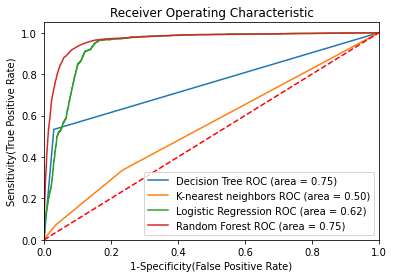

In [96]:
## Best model selection
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x1_train, y1_train) # train the model
    #y_pred=model.predict(xx_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y1_test, model.predict_proba(x1_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y1_test,model.predict(x1_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

#### From this ROC,has Decision Tree being the highest of 76%, Random Forest 75% and Logistic regresion 62%. 

## Declare X variables and y variable and split validation for all variables without dropping.

In [97]:
yy = cl['Cancelled']
xx = cl.drop(['Cancelled'], axis=1)

In [98]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, train_size = 0.7, random_state =100)

## Evaluating all model to determine which model is the most accurate with all variables.
####  Best model selection

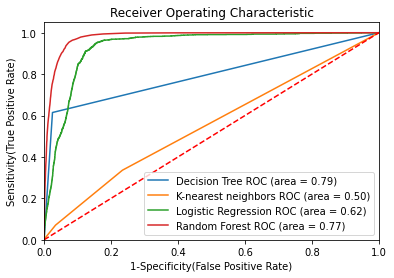

In [99]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(xx_train, yy_train) # train the model
    #y_pred=model.predict(xx_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(yy_test, model.predict_proba(xx_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(yy_test,model.predict(xx_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

#### Comparing the two evaluation for all dataset without dropping and dataset with dropping, we can see that dataset without dropping any variable had the highest ROC

### From this evaluation for dataset without dropping, we are going to use decision Tree, Logistic Regression and Random Forest to build our models

## Decision Tree

In [100]:
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt.fit(xx_train, yy_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

## Comparing the how accuracy of the prediction of both XX_train and xx_test

In [101]:
print(metrics.accuracy_score(yy_train, dt.predict(xx_train)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(yy_train, dt.predict(xx_train))) 
print("--------------------------------------------------------")
print(metrics.classification_report(yy_train, dt.predict(xx_train)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(yy_train, dt.predict(xx_train)))

0.9490499946927078
--------------------------------------------------------
[[61607   258]
 [ 3102   980]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     61865
           1       0.79      0.24      0.37      4082

    accuracy                           0.95     65947
   macro avg       0.87      0.62      0.67     65947
weighted avg       0.94      0.95      0.94     65947

--------------------------------------------------------
0.6179540109877948


#### From our decision tree model, we have 61607 borrowers who did not cancel and 258 misclassified as borrowers who who cancelled.
#### We also have 3102 misclassiffied borrowers who did not cancel the loan and 972 employees who cancelled the loan.
#### Our model accuracy is 0.95

## Model prediction XX_test

In [102]:
print(metrics.accuracy_score(yy_test, dt.predict(xx_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(yy_test, dt.predict(xx_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(yy_test, dt.predict(xx_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(yy_test, dt.predict(xx_test)))

0.9497222517071789
--------------------------------------------------------
[[26475   122]
 [ 1299   367]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26597
           1       0.75      0.22      0.34      1666

    accuracy                           0.95     28263
   macro avg       0.85      0.61      0.66     28263
weighted avg       0.94      0.95      0.94     28263

--------------------------------------------------------
0.6078505658758597


#### From our decision tree model, we have 26475 borrowers who did not cancel and 122 misclassified as borrowers who who cancelled.
#### We also have 1299 misclassiffied borrowers who did not cancel the loan and 367 employees who cancelled the loan.
#### So, what is the model accuracy?

#### The decision tree model is 94.97% accurate. Therefore, we expect that the model will be about 95% accurate when the model is applied into a real-world situation

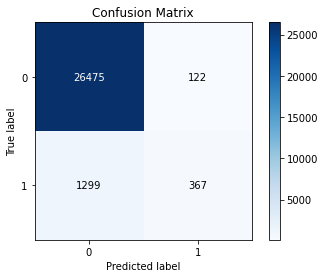

In [103]:
# Plot of decision tree metrics
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=np.array(yy_test), y_pred=dt.predict(xx_test))
plt.show()

## Text Representation

In [104]:
text_representation = tree.export_text(dt, feature_names=(list(xx.columns)))
print(text_representation)

|--- Payments_Rcvd <= 8.50
|   |--- Default_Charge <= 0.50
|   |   |--- Term <= 8.50
|   |   |   |--- class: 0
|   |   |--- Term >  8.50
|   |   |   |--- class: 0
|   |--- Default_Charge >  0.50
|   |   |--- Term <= 8.50
|   |   |   |--- class: 0
|   |   |--- Term >  8.50
|   |   |   |--- class: 1
|--- Payments_Rcvd >  8.50
|   |--- Default_Charge <= 2.61
|   |   |--- Payments_Rcvd <= 9.50
|   |   |   |--- class: 0
|   |   |--- Payments_Rcvd >  9.50
|   |   |   |--- class: 0
|   |--- Default_Charge >  2.61
|   |   |--- Payments_Rcvd <= 9.50
|   |   |   |--- class: 0
|   |   |--- Payments_Rcvd >  9.50
|   |   |   |--- class: 0



### From the text representation above, when  payment received is less or equal to 8.50  and default charge is less or equal to 0.50 with terms of payment less or equal  or greater than 8.50 then this borrower is likely to not cancel the loan but when default charge is greater 0.50  with terms of payment less or equal  or greater than 8.50 the borrower cancels the loan.

## Decision Tree Figure

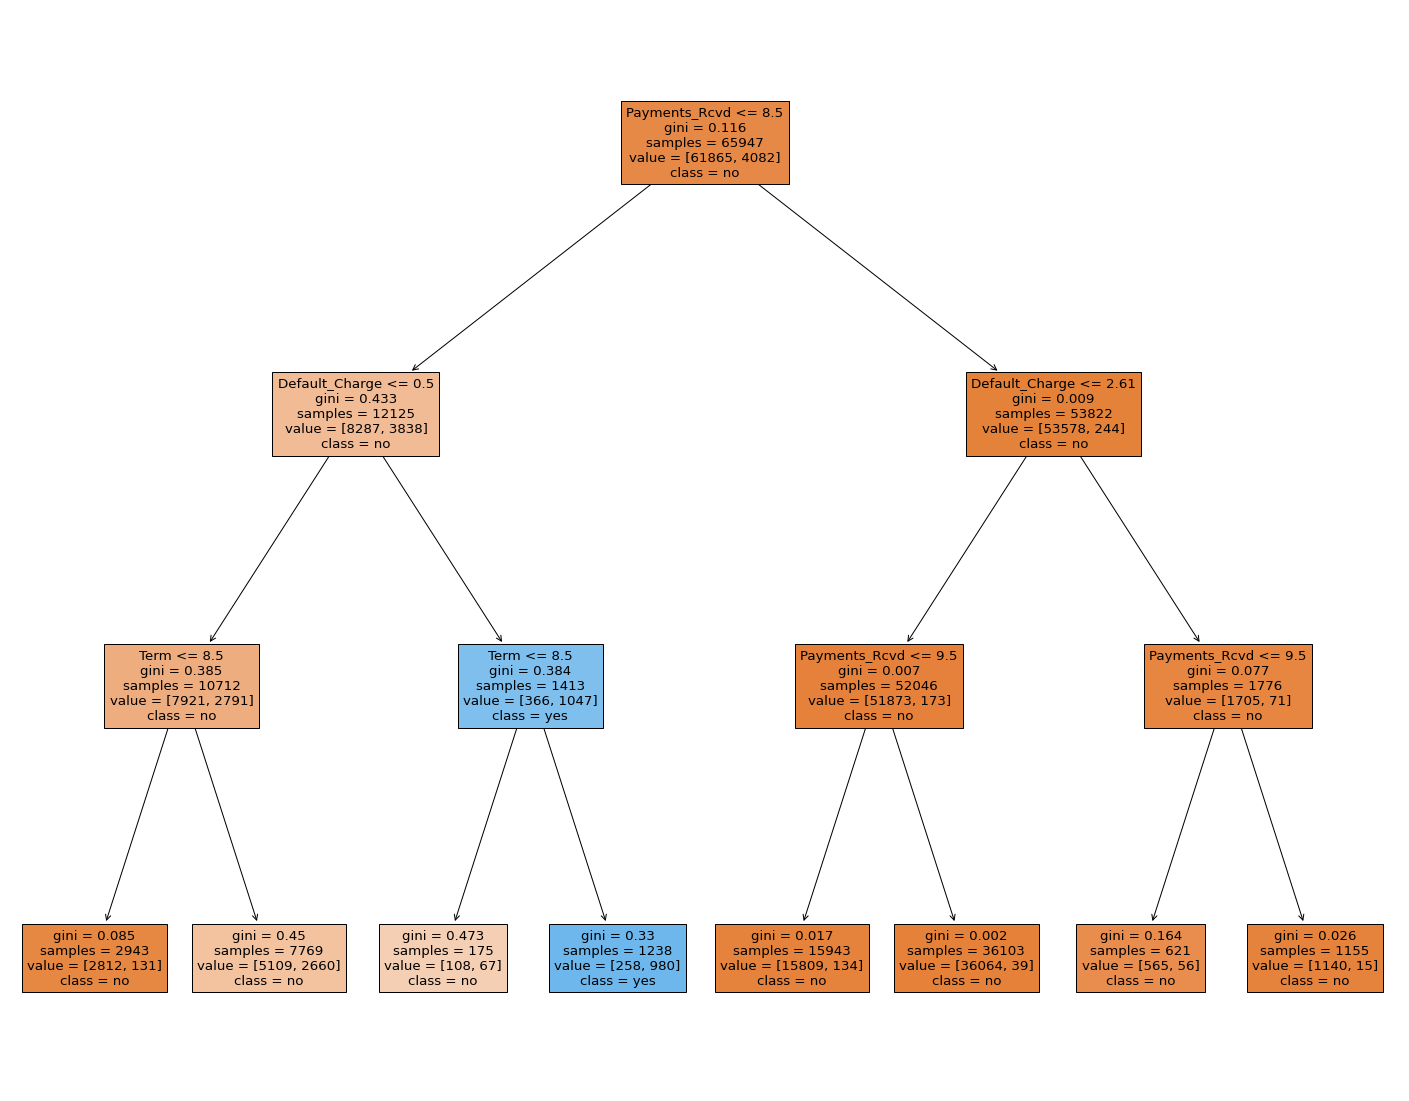

In [105]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, 
                feature_names = xx.columns, 
                class_names=['no','yes'],    # no: stay, yes: left
                filled = True);

# left arrow means "True"
# right arrow means "False"

### Interpreting decision tree
#### Payment_Rcvd (borrowers who's payment have been received) appears to be the single most influential factor. Many decision rules can be extracted. For example:

### Payment_Rcvd <= 8.5 means 61865 borrowers did not cancel the loan. Thus,

### All those 53578 borrowers and whose Default charge is  <= 2.61 (meaning less or equal to 2.61) are predicted as not cancel.

### All 244 borrowers cancelled with default charge greater than 2.61.

# Model Deployment

In [106]:
# defining the score dataset (y variable will be dropped)
score = cl.drop(columns=['Cancelled'])
score.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_3,Borrower_CreditScore_4,Borrower_CreditScore_5,Borrower_CreditScore_6,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,Borrower_Classification_Construction,Borrower_Classification_General,Borrower_Classification_Government,Borrower_Classification_Manufacturing,Borrower_Classification_Mining,Borrower_Classification_Real Estate,Borrower_Classification_Retail Trade,Borrower_Classification_Services,Borrower_Classification_Transportation,Borrower_Classification_Wholesale Trade,RecurringACH_TF_1,Borrower_EnrolledInEForms_1,Agent_RegisteredOnWeb_1.0,Agent_EnrolledInEForms_1.0,Agent_IntentEForm_1.0,Agent_RegisteredForCancelListReport_1.0,Agent_RegisteredForEimpendingReport_1.0,Agent_EnrolledInCreditProgram_1,Borrower_RegisteredOnWeb_1
7,0.0,844.32,30.0,23838.02,6372.01,14.00,10,10,1444.40,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0
8,0.0,15.69,0.0,4699.38,1203.98,17.95,10,1,124.58,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
12,0.0,0.00,0.0,996.64,249.16,23.95,9,9,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1
14,0.0,0.00,0.0,12440.00,3266.00,14.00,10,10,30.30,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
16,0.0,21.82,0.0,5368.00,1342.00,17.95,10,10,0.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0


In [107]:
# finding data types
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94210 entries, 7 to 140573
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Default_Charge                           94210 non-null  float64
 1   Late_Charge                              94210 non-null  float64
 2   NSF_Charge                               94210 non-null  float64
 3   Premium                                  94210 non-null  float64
 4   Down                                     94210 non-null  float64
 5   APR                                      94210 non-null  float64
 6   Term                                     94210 non-null  int64  
 7   Payments_Rcvd                            94210 non-null  int64  
 8   Exposure                                 94210 non-null  float64
 9   Borrower_CreditScore_1                   94210 non-null  uint8  
 10  Borrower_CreditScore_2                   9421

### Deploy the model for real world

In [108]:
predictedY = dt.predict(score)
predictedY

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Combine the predicted Y value with the scoring dataset

In [109]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [110]:
# predicted Y vrs YY
yy.head(20)

7     0
8     1
12    0
14    0
16    0
18    0
22    0
24    0
26    0
30    0
31    1
32    0
33    0
34    1
35    0
38    0
39    0
41    0
42    1
43    0
Name: Cancelled, dtype: int64

# finally ...

In [111]:
score = score.reset_index(drop=True)
predictedY = predictedY.reset_index(drop=True)

new_data = score.join(predictedY) 
new_data.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_3,Borrower_CreditScore_4,Borrower_CreditScore_5,Borrower_CreditScore_6,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,Borrower_Classification_Construction,Borrower_Classification_General,Borrower_Classification_Government,Borrower_Classification_Manufacturing,Borrower_Classification_Mining,Borrower_Classification_Real Estate,Borrower_Classification_Retail Trade,Borrower_Classification_Services,Borrower_Classification_Transportation,Borrower_Classification_Wholesale Trade,RecurringACH_TF_1,Borrower_EnrolledInEForms_1,Agent_RegisteredOnWeb_1.0,Agent_EnrolledInEForms_1.0,Agent_IntentEForm_1.0,Agent_RegisteredForCancelListReport_1.0,Agent_RegisteredForEimpendingReport_1.0,Agent_EnrolledInCreditProgram_1,Borrower_RegisteredOnWeb_1,predicted Y
0,0.0,844.32,30.0,23838.02,6372.01,14.00,10,10,1444.40,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0
1,0.0,15.69,0.0,4699.38,1203.98,17.95,10,1,124.58,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0
2,0.0,0.00,0.0,996.64,249.16,23.95,9,9,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0
3,0.0,0.00,0.0,12440.00,3266.00,14.00,10,10,30.30,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0
4,0.0,21.82,0.0,5368.00,1342.00,17.95,10,10,0.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0


In [112]:
# Looking for missing values
new_data.isnull().sum()


Default_Charge                             0
Late_Charge                                0
NSF_Charge                                 0
Premium                                    0
Down                                       0
APR                                        0
Term                                       0
Payments_Rcvd                              0
Exposure                                   0
Borrower_CreditScore_1                     0
Borrower_CreditScore_2                     0
Borrower_CreditScore_3                     0
Borrower_CreditScore_4                     0
Borrower_CreditScore_5                     0
Borrower_CreditScore_6                     0
Region_Midwest                             0
Region_Northeast                           0
Region_Southeast                           0
Region_Southwest                           0
Region_West                                0
Borrower_Classification_Construction       0
Borrower_Classification_General            0
Borrower_C

In [113]:
new_data.to_csv("data/output_perdicted.csv")

### Evaluate the decision tree model using 10-fold cross-validation

In [114]:
# initialize decision tree algorithm (without fitting)

scores = cross_val_score(DecisionTreeClassifier(), xx, yy, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.94682093 0.95085447 0.9451226  0.94926229 0.95053604 0.94554718
 0.94894385 0.95064218 0.94575947 0.94427343]
0.9477762445600255


### The mean score and the 95% confidence interval of the score estimate are hence given by:

In [115]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.00)


#### Accuracy still remains the same.

### calculate the fpr and tpr for all thresholds of the classification

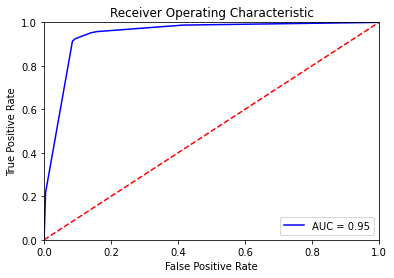

In [116]:
preds = dt.predict_proba(xx_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(yy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
clf=clf.fit(xx_train, yy_train)
clf.score(xx_test, yy_test)

0.962424371085872

### Generating evaluation of metrics

In [118]:
print(metrics.accuracy_score(yy_test, clf.predict(xx_test))) #overall accuracy
print(metrics.confusion_matrix(yy_test, clf.predict(xx_test)))
print(metrics.classification_report(yy_test, clf.predict(xx_test)))

0.962424371085872
[[26304   293]
 [  769   897]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26597
           1       0.75      0.54      0.63      1666

    accuracy                           0.96     28263
   macro avg       0.86      0.76      0.80     28263
weighted avg       0.96      0.96      0.96     28263



#### From our Random Forest classifier model, we have 26304 borrowers who did not cancel and 293 misclassified as borrowers who who cancelled.
#### We also have 769 misclassiffied borrowers who did not cancel the loan and 897 borrowers who cancelled the loan.
#### So, what is the model accuracy?
#### The decision tree model is 96.24% accurate. Therefore, we expect that the model will be about 96% accurate when the model is applied into a real-world situation

In [119]:
# another method
pd.DataFrame(clf.feature_importances_, index = xx.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
Payments_Rcvd,0.328660
Late_Charge,0.082734
Down,0.069281
Premium,0.068607
APR,0.064679
Exposure,0.062954
Default_Charge,0.060665
Term,0.057458
Borrower_RegisteredOnWeb_1,0.020461
Borrower_CreditScore_5,0.011546


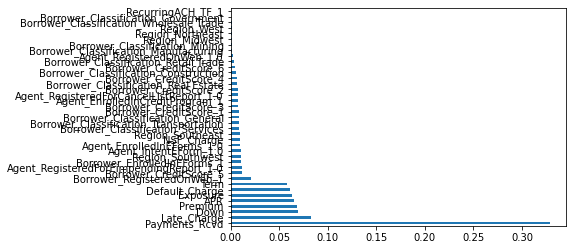

In [120]:
pd.DataFrame(clf.feature_importances_, index = xx.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

#### Identifying 5 most important X variables are Payments_Rcvd , Late_Charge, Premium, Exposure, APR and Term.

### Predict class probabilities for xx

In [121]:
clf.predict_proba(xx_test)
# 1st value: the probability of NOT cancelling
# 2nd value: the probability of not cancelling
# 3rd value: the probability of cancelling

array([[0.99, 0.01],
       [0.84, 0.16],
       [1.  , 0.  ],
       ...,
       [0.55, 0.45],
       [0.65, 0.35],
       [0.84, 0.16]])

## Make predictions on the new dataset (scoring dataset without y value)

In [122]:
# score has been defined already using decision tree
output_scoring = clf.predict(score)
predicted_y2= pd.DataFrame(output_scoring, columns=['Predicted cancellation'])

probs = clf.predict_proba(score)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

Predicted_cancellation = predicted_y2.join(probs)

Predicted_cancellation

,Predicted cancellation,prob of NO,prob of YES
0,0,0.98,0.02
1,1,0.05,0.95
2,0,1.00,0.00
3,0,1.00,0.00
4,0,0.98,0.02
...,...,...,...
94205,0,1.00,0.00
94206,0,1.00,0.00
94207,0,0.98,0.02
94208,0,0.85,0.15


In [123]:
# Save new dataset
Predicted_cancellation.to_csv("data/output_Predicted_Cancellation.csv")

## The Cross Validation or 10 fold CV

In [124]:
scores = cross_val_score(RandomForestClassifier(), xx, yy, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.96008916 0.95870927 0.95987687 0.95870927 0.96369812 0.9590277
 0.9564802  0.95934614 0.95924    0.95584333]
0.9591020061564588


# Using ROC for evaluation

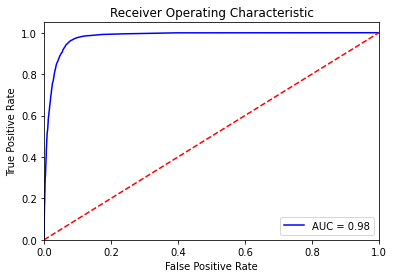

In [125]:
preds = clf.predict_proba(xx_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(yy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic regression

In [126]:
lr = LogisticRegression(solver='lbfgs', max_iter=20000)
lr.fit(xx_train, yy_train)
# print coefficients
coef = pd.DataFrame(list(zip(xx.columns, np.transpose(lr.coef_))), 
             columns=['xx variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,xx variables,coef
0,Default_Charge,0.073385
5,APR,0.034505
2,NSF_Charge,0.019448
13,Borrower_CreditScore_5,0.010448
28,Borrower_Classification_Transportation,0.009428
18,Region_Southwest,0.007841
12,Borrower_CreditScore_4,0.006384
11,Borrower_CreditScore_3,0.002994
35,Agent_RegisteredForCancelListReport_1.0,0.002032
21,Borrower_Classification_General,0.001421


#### Coefficients of X variables are in descending order above

## Model evaluation

In [127]:
print(metrics.accuracy_score(yy_test, lr.predict(xx_test)))
print(metrics.confusion_matrix(yy_test, lr.predict(xx_test)))
print(metrics.classification_report(yy_test, lr.predict(xx_test)))
print(metrics.roc_auc_score(yy_test, lr.predict(xx_test)))

0.9360294377808442
[[26016   581]
 [ 1227   439]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     26597
           1       0.43      0.26      0.33      1666

    accuracy                           0.94     28263
   macro avg       0.69      0.62      0.65     28263
weighted avg       0.92      0.94      0.93     28263

0.620830416612259


#### From our Logistic Regression model, we have 26016 borrowers who did not cancel and 581 misclassified as borrowers who who cancelled.
#### We also have 1227 misclassiffied borrowers who did not cancel the loan and 439 borrowers who cancelled the loan.
#### So, what is the model accuracy?
#### The logistic model is 93.60% accurate. Therefore, we expect that the model will be about 94% accurate when the model is applied into a real-world situation

## Evaluate the logit model using 10-fold cross-validation

In [128]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=20000), xx, yy, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.9361002  0.93270353 0.93089906 0.93790468 0.94406114 0.93716166
 0.92941301 0.93503874 0.93779854 0.9310052 ]
0.9352085765842266


### Generating class probabilities

In [129]:
probs = lr.predict_proba(xx_test)
print(probs)
#1st column: probability of NOT cancelling
#2nd column: probabiility of cancelling


[[0.89874637 0.10125363]
 [0.30691474 0.69308526]
 [0.98807384 0.01192616]
 ...
 [0.73714458 0.26285542]
 [0.42320999 0.57679001]
 [0.87362931 0.12637069]]


### Making predictions on the new dataset (scoring dataset without y value)

In [130]:
output_scoring = lr.predict(score)
predicted_y= pd.DataFrame(output_scoring, columns=['predicted cancelled'])
predicted_y

,predicted cancelled
0,0
1,1
2,0
3,0
4,0
...,...
94205,0
94206,0
94207,0
94208,1


In [131]:
probs = lr.predict_proba(score)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])
probs

,prob of NO,prob of YES
0,0.975491,0.024509
1,0.487159,0.512841
2,0.972508,0.027492
3,0.987123,0.012877
4,0.985550,0.014450
...,...,...
94205,0.993990,0.006010
94206,0.994110,0.005890
94207,0.985862,0.014138
94208,0.393630,0.606370


In [132]:
probable_to_cancel = predicted_y.join(probs)
probable_to_cancel

,predicted cancelled,prob of NO,prob of YES
0,0,0.975491,0.024509
1,1,0.487159,0.512841
2,0,0.972508,0.027492
3,0,0.987123,0.012877
4,0,0.985550,0.014450
...,...,...,...
94205,0,0.993990,0.006010
94206,0,0.994110,0.005890
94207,0,0.985862,0.014138
94208,1,0.393630,0.606370


In [133]:
probable_to_cancel.isnull().sum()

predicted cancelled    0
prob of NO             0
prob of YES            0
dtype: int64

In [134]:
probable_to_cancel.to_csv("data/output_left_LogisticRegression_ModelDeployment.csv")

## Using ROC for evaluation

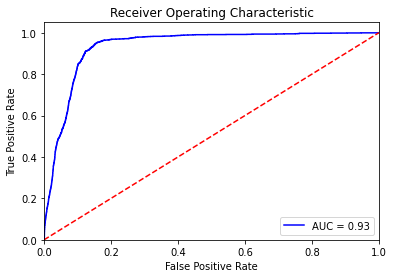

In [135]:
preds = lr.predict_proba(xx_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(yy_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Recursive Feature Selection (RFE)

In [136]:
model = LogisticRegression(solver='lbfgs', max_iter=20000)
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(xx, yy)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

C:\Users\Nana Tieku\.conda\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False False False False False False False False False  True  True False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True]
[21 32 30 35 33 31  6  5 34  1  1 18  8  3  1  1 26 25 19  9 23 24 17 20
  4 10 16 14  2 11 12 15 13 27 28 22 29  7  1]


In [137]:
# Features sorted by their rank
pd.DataFrame({'feature':xx.columns, 'importance':rfe.ranking_})

,feature,importance
0,Default_Charge,21
1,Late_Charge,32
2,NSF_Charge,30
3,Premium,35
4,Down,33
5,APR,31
6,Term,6
7,Payments_Rcvd,5
8,Exposure,34
9,Borrower_CreditScore_1,1


#### The independent variables that ranked high are 'Borrower_CreditScore_1', 'Borrower_CreditScore_2', 'Borrower_CreditScore_6', 'Region_Midwest', 'Borrower_RegisteredOnWeb_1'. These variables will feature in the next model building. 

# Advanced algorithms with Featured selection

In [138]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Here I select 5 most significant features only

In [139]:
X_rfe =cl[['Borrower_CreditScore_1', 'Borrower_CreditScore_2', 'Borrower_CreditScore_6', 'Region_Midwest', 
             'Borrower_RegisteredOnWeb_1']]
print(X_rfe.head())


    Borrower_CreditScore_1  Borrower_CreditScore_2  Borrower_CreditScore_6  \
7                        0                       0                       1   
8                        0                       0                       0   
12                       0                       1                       0   
14                       0                       0                       0   
16                       0                       0                       0   

    Region_Midwest  Borrower_RegisteredOnWeb_1  
7                0                           0  
8                0                           0  
12               0                           1  
14               0                           0  
16               0                           0  


# Slipt Validation

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, yy, test_size=0.3, random_state=0)

# Gradient Boost

In [141]:
# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0) 

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [142]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

# y-test is the acual y value in the testing dataset
# gb.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.9377277712910873
--------------------------------------------------------
[[26503     0]
 [ 1760     0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26503
           1       0.00      0.00      0.00      1760

    accuracy                           0.94     28263
   macro avg       0.47      0.50      0.48     28263
weighted avg       0.88      0.94      0.91     28263

--------------------------------------------------------
0.5


C:\Users\Nana Tieku\.conda\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The accuracy is 94%

# Logistic Regression

In [143]:
rfe = LogisticRegression()
rfe.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, rfe.predict(X_test)))
print(metrics.confusion_matrix(y_test, rfe.predict(X_test)))
print(metrics.classification_report(y_test, rfe.predict(X_test)))
print(metrics.roc_auc_score(y_test, rfe.predict(X_test)))

0.9377277712910873
[[26503     0]
 [ 1760     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26503
           1       0.00      0.00      0.00      1760

    accuracy                           0.94     28263
   macro avg       0.47      0.50      0.48     28263
weighted avg       0.88      0.94      0.91     28263

0.5


C:\Users\Nana Tieku\.conda\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### From our Logistic Regression Classifier and Gradient Boost Classifier, we have 26503 borrowers who did not cancel and 0 misclassified as borrowers who who cancelled.
#### We also have 1760 borrowers who did cancelled the loan and 0 borrowers misclassified.
#### So, what is the model accuracy?
#### The Logistic and Gradient is 93.77% accurate. Therefore, we expect that the model will be about 94% accurate when the model is applied into a real-world situation.
## With this level of accuracy in detail, these variables 'Borrower_CreditScore_1', 'Borrower_CreditScore_2', 'Borrower_CreditScore_6', 'Region_Midwest', and 'Borrower_RegisteredOnWeb_1', becomes the most influenced independent variables.

# Evaluate the logit model using 10-fold cross-validation

In [144]:
scores = cross_val_score(gb, X_rfe, yy, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.93907229 0.93907229 0.93896614 0.93896614 0.93896614 0.93896614
 0.93896614 0.93896614 0.93896614 0.93896614]
0.9389873686445174


# Model Deployment for Gradient Boost Classifier

In [145]:
gb_predicted = rfe.predict(X_test)
gb_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
# combining dataset and predicted y
gb_predicted = pd.DataFrame(predictedY, columns=['predicted Y'])
gb_predicted.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [147]:
# Finally
X_rfe = X_rfe.reset_index(drop=True)
gb_predicted = gb_predicted.reset_index(drop=True)

gb_data = X_rfe.join(gb_predicted) 
gb_data.head()

,Borrower_CreditScore_1,Borrower_CreditScore_2,Borrower_CreditScore_6,Region_Midwest,Borrower_RegisteredOnWeb_1,predicted Y
0,0,0,1,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [148]:
gb_data.to_csv("data/gb_perdicted.csv")

# calculate the fpr and tpr for all thresholds of the classification

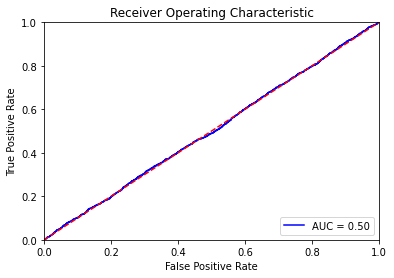

In [149]:
gb_predicted = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion & Storytelling

### All three classification algorithms (decision tree, logistic regression, Random Forest Classifier) work well for this dataset
#### Certain predictors are found important in predicting who cancelled their loans. These variables includes Payments_Rcvd , Late_Charge, Premium, Exposure, APR and Term, Borrower_CreditScore_1, Borrower_CreditScore_2, Borrower_CreditScore_6, Region_Midwest, and Borrower_RegisteredOnWeb_1. These are the most influencial variables ('Borrower_CreditScore_1', 'Borrower_CreditScore_2', 'Borrower_CreditScore_6', 'Region_Midwest', and 'Borrower_RegisteredOnWeb_1') even though they are already mentioned.
## Technical and Managerial Implications
#### At the 0.05 significance level, all p-values greater are statistically not significant therefore all the variables will be dropped. These variables are  Borrower_Classification_Mining, Borrower_Classification_Manufacturing, Borrower_Classification_Wholesale Trade, Agent_IntentEForm_1.0, Agent_RegisteredForEimpendingReport_1.0, Borrower_Classification_Government, Region_West, Term.
#### But in the real world, term of payment plays a significant role in payment of loans. That's whether the borrower will have enough time to payoff the loan taken. Therefore, after careful consideration, all variables that were selected for the classification analysis were used since after the ROC evaluation, it came out with the highest area under the curve.
#### Managers must consider the APR by decreasing it to enable borrowers to payoff loans rather than cancelling the loans. The measures used in determining APR such as risk scores and credit score have to be looked at well. For instance, a salary worker working for the government is sure to be paid at the end of every month but in some cases, this worker may not have a credit score. Managers can reduce the APR for such workers to help them payoff their loans.
#### Late charges can also be reduced for borrowers who normally do not delay in payments. 


# REGRESSION ANALYSIS

# Import Packages

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [151]:
re = pd.read_csv("data/regression.csv")
re.head()

,Premium,Down,APR,Term,Exposure,CreditScore,FinChg,AmtFin,Amt_Interest
0,2078.00,737.00,19.95,9,0.00,NaN,113.94,1341.00,1454.94
1,12033.18,3167.00,10.65,10,442.96,NaN,438.52,8866.18,9304.70
2,13650.94,3655.73,14.00,10,0.00,NaN,652.49,9995.21,10647.70
3,8782.00,2533.00,14.50,9,0.00,NaN,383.55,6249.00,6632.55
4,1259.00,427.25,23.95,9,0.00,NaN,85.17,831.75,916.92


## Finding data information

In [152]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Premium       140574 non-null  float64
 1   Down          140574 non-null  float64
 2   APR           140574 non-null  float64
 3   Term          140574 non-null  int64  
 4   Exposure      140567 non-null  float64
 5   CreditScore   94218 non-null   object 
 6   FinChg        140574 non-null  float64
 7   AmtFin        140574 non-null  float64
 8   Amt_Interest  140574 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.7+ MB


## How many missing values in each column or variable

In [153]:
re.isnull().sum()

Premium             0
Down                0
APR                 0
Term                0
Exposure            7
CreditScore     46356
FinChg              0
AmtFin              0
Amt_Interest        0
dtype: int64

## Dropping AmtFin

In [154]:
re = re.drop(['AmtFin'], axis=1)
re.head(2)

,Premium,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest
0,2078.00,737.0,19.95,9,0.00,NaN,113.94,1454.94
1,12033.18,3167.0,10.65,10,442.96,NaN,438.52,9304.70


## Handlingmissing values for Exposure, we find the median and replace it with the null value.

In [155]:
re['Exposure'].median()

218.82

In [156]:
re = re.fillna({'Exposure': 218.82})

## Dropping null values

In [157]:
re = re.dropna()
re.head()

,Premium,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest
7,23838.02,6372.01,14.00,10,1444.40,NS,1049.02,18515.03
8,4699.38,1203.98,17.95,10,124.58,3,284.58,3779.98
12,996.64,249.16,23.95,9,0.00,2,76.56,824.04
14,12440.00,3266.00,14.00,10,30.30,3,598.90,9772.90
16,5368.00,1342.00,17.95,10,0.00,5,338.60,4364.60


## How many missing values in each column or variable

In [158]:
re.isnull().sum()

Premium         0
Down            0
APR             0
Term            0
Exposure        0
CreditScore     0
FinChg          0
Amt_Interest    0
dtype: int64

## Finding Data information

In [159]:
re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94218 entries, 7 to 140573
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Premium       94218 non-null  float64
 1   Down          94218 non-null  float64
 2   APR           94218 non-null  float64
 3   Term          94218 non-null  int64  
 4   Exposure      94218 non-null  float64
 5   CreditScore   94218 non-null  object 
 6   FinChg        94218 non-null  float64
 7   Amt_Interest  94218 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.5+ MB


## Mappling or replacing credit score

In [160]:
re = re.replace({'CreditScore': 'NS'}, {'CreditScore': '6'})

## Converting object to number for CreditScore

In [161]:
re['CreditScore'] = re['CreditScore'].astype(int)
print(re.dtypes)

Premium         float64
Down            float64
APR             float64
Term              int64
Exposure        float64
CreditScore       int32
FinChg          float64
Amt_Interest    float64
dtype: object


##  Exploratory data analysis

In [162]:
re.describe()

,Premium,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest
count,9.421800e+04,9.421800e+04,94218.000000,94218.000000,9.421800e+04,94218.000000,94218.000000,9.421800e+04
mean,2.992022e+04,5.753946e+03,11.615561,9.583530,3.007547e+03,2.780063,698.525747,2.486480e+04
std,1.397199e+05,3.173175e+04,4.306083,1.379986,2.957815e+04,1.610404,2071.396710,1.177527e+05
min,2.200000e+02,0.000000e+00,0.000000,1.000000,-4.497573e+05,0.000000,0.000000,3.726000e+01
25%,2.750265e+03,5.532525e+02,8.200000,9.000000,2.980750e+01,2.000000,130.570000,2.240512e+03
50%,6.490025e+03,1.362400e+03,11.750000,10.000000,3.135650e+02,3.000000,264.110000,5.327030e+03
75%,1.873650e+04,3.758972e+03,14.550000,10.000000,1.107082e+03,4.000000,582.780000,1.538091e+04
max,1.486929e+07,2.650548e+06,35.000000,36.000000,6.865997e+06,6.000000,161888.450000,1.377858e+07


## Correlation analysis

In [163]:
re.corr()

,Premium,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest
Premium,1.000000,0.802316,-0.257572,0.034143,0.716065,-0.021938,0.930263,0.986712
Down,0.802316,1.000000,-0.204859,-0.001670,0.322799,-0.013319,0.695234,0.694743
APR,-0.257572,-0.204859,1.000000,-0.111286,-0.140395,0.097925,-0.292815,-0.255569
Term,0.034143,-0.001670,-0.111286,1.000000,0.038165,-0.008311,0.068881,0.042174
Exposure,0.716065,0.322799,-0.140395,0.038165,1.000000,-0.015463,0.647690,0.774057
CreditScore,-0.021938,-0.013319,0.097925,-0.008311,-0.015463,1.000000,-0.027557,-0.022926
FinChg,0.930263,0.695234,-0.292815,0.068881,0.647690,-0.027557,1.000000,0.934048
Amt_Interest,0.986712,0.694743,-0.255569,0.042174,0.774057,-0.022926,0.934048,1.000000


#### Our correlation analysis shows a high positive relationship between Premium and down payment. This means that as premium increases down payment increases.
#### The relationship between premium and APR is a negative one.That is as premium increases, APR decreases and vice versa.
#### Terms of payment has a positive relationship with premium. Thus, as premium increases, terms of payment increases.
#### Premium has a positive relationship with Exposure. 
#### Credit score has a negative relationship with premium. A high cresit score means a low premium.
#### FinChg is the interest income earned and has a positive relationship with premium. A high premium means a interest earned on the loan.
#### Amt_Interest is the amount to be financed plus interest. It has a positive relationship with premium.

## Variables with the highest correlation to premium

In [164]:
corr = pd.DataFrame(re.corr()['Premium'].drop('Premium'))
corr.sort_values(['Premium'], ascending = False)

,Premium
Amt_Interest,0.986712
FinChg,0.930263
Down,0.802316
Exposure,0.716065
Term,0.034143
CreditScore,-0.021938
APR,-0.257572


## Correlation heatmap

<AxesSubplot:>

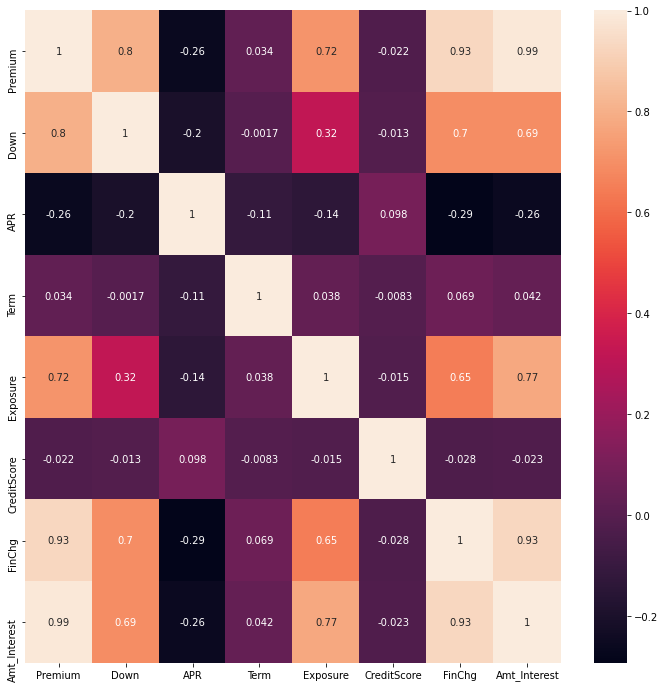

In [165]:
plt.figure(figsize=(12,12))
sns.heatmap(re.corr(), annot=True)

## Visualisation exhibiting the relationship between premium and independent variables.

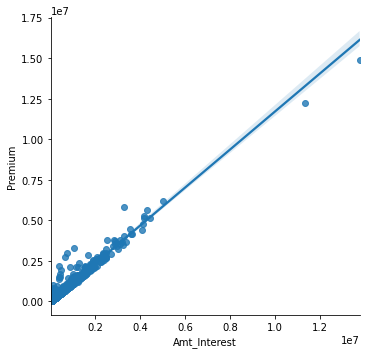

In [166]:
sns.lmplot('Amt_Interest', 'Premium', re)

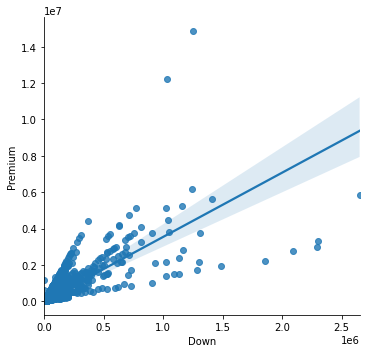

In [167]:
sns.lmplot('Down', 'Premium', re)

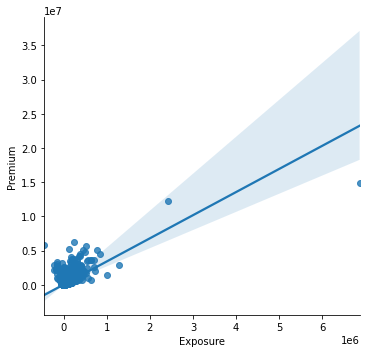

In [168]:
 sns.lmplot('Exposure', 'Premium', re)

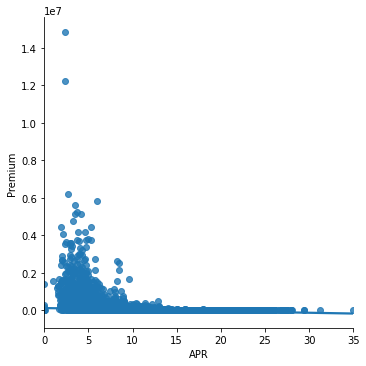

In [169]:
sns.lmplot('APR', 'Premium', re)

## checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)

In [170]:
import scipy.stats as stats
re_corr = pd.DataFrame() # Correlation matrix
re_p = pd.DataFrame() # Matrix of p-values
for x in re.columns:   # assuming df as your dataframe name
   for y in re.columns:
      corr = stats.pearsonr(re[x], re[y])
      re_corr.loc[x,y] = corr[0]
      re_p.loc[x,y] = corr[1]

re_p['Premium']

Premium         0.000000e+00
Down            0.000000e+00
APR             0.000000e+00
Term            1.033473e-25
Exposure        0.000000e+00
CreditScore     1.643323e-11
FinChg          0.000000e+00
Amt_Interest    0.000000e+00
Name: Premium, dtype: float64

#### At 0.05 significance level, all p-values for X variables are less than 0.05 thus, all x variables are significant.

# Model Building, Validation and Deployment

## declare X variables and y variable

In [171]:
y = re['Premium']
x = re.drop(['Premium'], axis=1)

## Using train_test_split technique for predictive analysis

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 100)

In [173]:
x_train.head()

,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest
123758,652.95,7.94,10,383.06,2,135.95,3836.00
61457,3514.67,6.64,9,1546.78,6,343.27,12659.85
59390,1257.63,10.95,10,99.31,1,181.41,3747.90
79674,679.86,14.10,10,960.15,1,253.37,4105.90
25922,265.20,15.20,10,322.28,5,147.10,2218.90


In [174]:
y_train.head()

123758     4353.00
61457     15831.25
59390      4824.12
79674      4532.39
25922      2337.00
Name: Premium, dtype: float64

In [175]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(65952, 7)
(28266, 7)
(65952,)
(28266,)


# Using Multiple Linear Regression to build our first model without using slit test validation

In [176]:
model = lm.LinearRegression()
model.fit(x, y)   
model_y = model.predict(x)
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [ 1.00000000e+00  2.17509746e-12  5.88112083e-12 -6.67876827e-15
  1.69675155e-12 -1.00000000e+00  1.00000000e+00]
y-intercept  -1.5279510989785194e-10


In [177]:
print("mean square error: ", mean_squared_error(y, model_y))
print("variance or r-squared: ", explained_variance_score(y, model_y))

mean square error:  8.32563484681299e-20
variance or r-squared:  1.0


In [178]:
coef = ["%.3f" % i for i in model.coef_]
xcolumns = [ i for i in x.columns ]
list(zip(xcolumns, coef))

[('Down', '1.000'),
 ('APR', '0.000'),
 ('Term', '0.000'),
 ('Exposure', '-0.000'),
 ('CreditScore', '0.000'),
 ('FinChg', '-1.000'),
 ('Amt_Interest', '1.000')]

## model validation and Deployment using x_test

In [179]:
y_predict = model.predict(x_test)
y_predict

array([ 1426.65, 45666.6 ,  1664.  , ...,  2201.85,  6361.  , 16486.  ])

In [180]:
y_test.head()

137335     1426.65
49461     45666.60
19639      1664.00
128320    23032.53
62450      5862.65
Name: Premium, dtype: float64

In [181]:
y_predict = pd.DataFrame(y_predict, columns=['predicted Y'])
y_predict.head(10)

,predicted Y
0,1426.65
1,45666.60
2,1664.00
3,23032.53
4,5862.65
5,11712.15
6,5250.00
7,11591.00
8,12123.30
9,3302.00


## Finally ...

In [182]:
x_test = x_test.reset_index(drop=True)
y_predict = y_predict.reset_index(drop=True)

data = x_test.join(y_predict) 
data.head()

,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest,predicted Y
0,357.33,20.04,10,55.36,5,100.68,1170.00,1426.65
1,9733.32,9.50,10,2245.83,1,1583.12,37516.40,45666.60
2,525.00,21.25,9,0.00,3,103.18,1242.18,1664.00
3,4606.51,8.50,10,1869.12,2,725.48,19151.50,23032.53
4,1758.79,15.25,9,1143.64,2,265.19,4369.05,5862.65


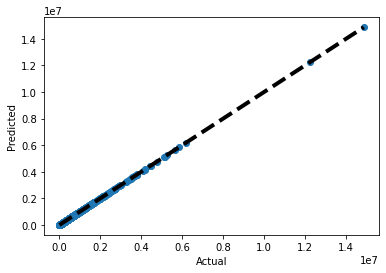

In [183]:
plt.subplots()
plt.scatter(y, model_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Premium')

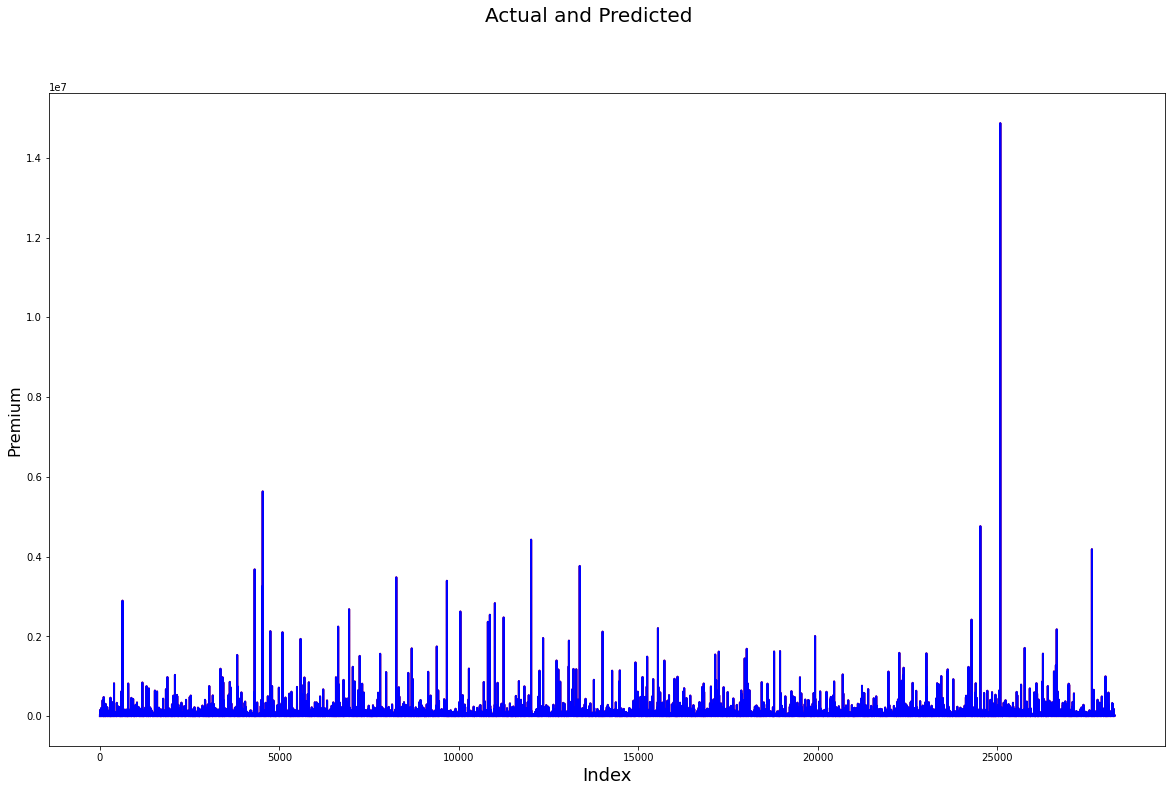

In [184]:
c = [i for i in range(1, 28267, 1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c, y_test, color = "red", linewidth = 2, linestyle = "-" )
plt.plot(c, y_predict, color = "blue", linewidth = 2, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Premium', fontsize = 16)

# Using Multiple Linear Regression for our model using slipt test validity.

In [185]:
lr = lm.LinearRegression()
lr.fit(x_train, y_train)
y_predd = lr.predict(x_test)
print('Coefficients: ', lr.coef_)
print("y-intercept ", lr.intercept_)

Coefficients:  [ 1.00000000e+00 -3.74277149e-12 -5.96226105e-12  5.84210443e-15
  7.27502417e-13 -1.00000000e+00  1.00000000e+00]
y-intercept  4.3655745685100555e-11


In [186]:
coef = ["%.3f" % i for i in lr.coef_]
xcolumns = [ i for i in x.columns ]
list(zip(xcolumns, coef))

[('Down', '1.000'),
 ('APR', '-0.000'),
 ('Term', '-0.000'),
 ('Exposure', '0.000'),
 ('CreditScore', '0.000'),
 ('FinChg', '-1.000'),
 ('Amt_Interest', '1.000')]

### The coefficients of the variables represents the change in the mean of premium for each change in each variables. For instance, a change in the premium for each increase in down payments, holding the other variables fixed, on average, we expect the premium to increase by 1. Also, a change in the premium for each increase in APR, holding the other variables fixed, on average, we expect the median value to decrease by -3.7427714e-12.

In [187]:
print("mean square error: ", mean_squared_error(y_test, y_predd))
print("variance or r-squared: ", explained_variance_score(y_test, y_predd))

mean square error:  5.446493483584952e-20
variance or r-squared:  1.0


#### About 100% of the sample variation can be explained by using the multiple regression model. The closer it is to 100% the better the model.

## Model Deployment using x_test as the score test

In [188]:
y_predd = lr.predict(x_test)
y_predd

array([ 1426.65, 45666.6 ,  1664.  , ...,  2201.85,  6361.  , 16486.  ])

In [189]:
y_test.head()

137335     1426.65
49461     45666.60
19639      1664.00
128320    23032.53
62450      5862.65
Name: Premium, dtype: float64

In [190]:
y_predd = pd.DataFrame(y_predd, columns=['predicted Y'])
y_predd.head(10)

,predicted Y
0,1426.65
1,45666.60
2,1664.00
3,23032.53
4,5862.65
5,11712.15
6,5250.00
7,11591.00
8,12123.30
9,3302.00


In [191]:
#finally ...
x_test = x_test.reset_index(drop=True)
y_predd = y_predd.reset_index(drop=True)

dat = x_test.join(y_predd) 
dat.head()

,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest,predicted Y
0,357.33,20.04,10,55.36,5,100.68,1170.00,1426.65
1,9733.32,9.50,10,2245.83,1,1583.12,37516.40,45666.60
2,525.00,21.25,9,0.00,3,103.18,1242.18,1664.00
3,4606.51,8.50,10,1869.12,2,725.48,19151.50,23032.53
4,1758.79,15.25,9,1143.64,2,265.19,4369.05,5862.65


## Plotting Actual and Predicted

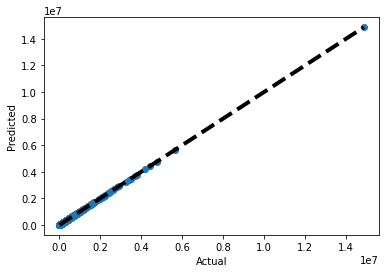

In [192]:
plt.subplots()
plt.scatter(y_test, y_predd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Premium')

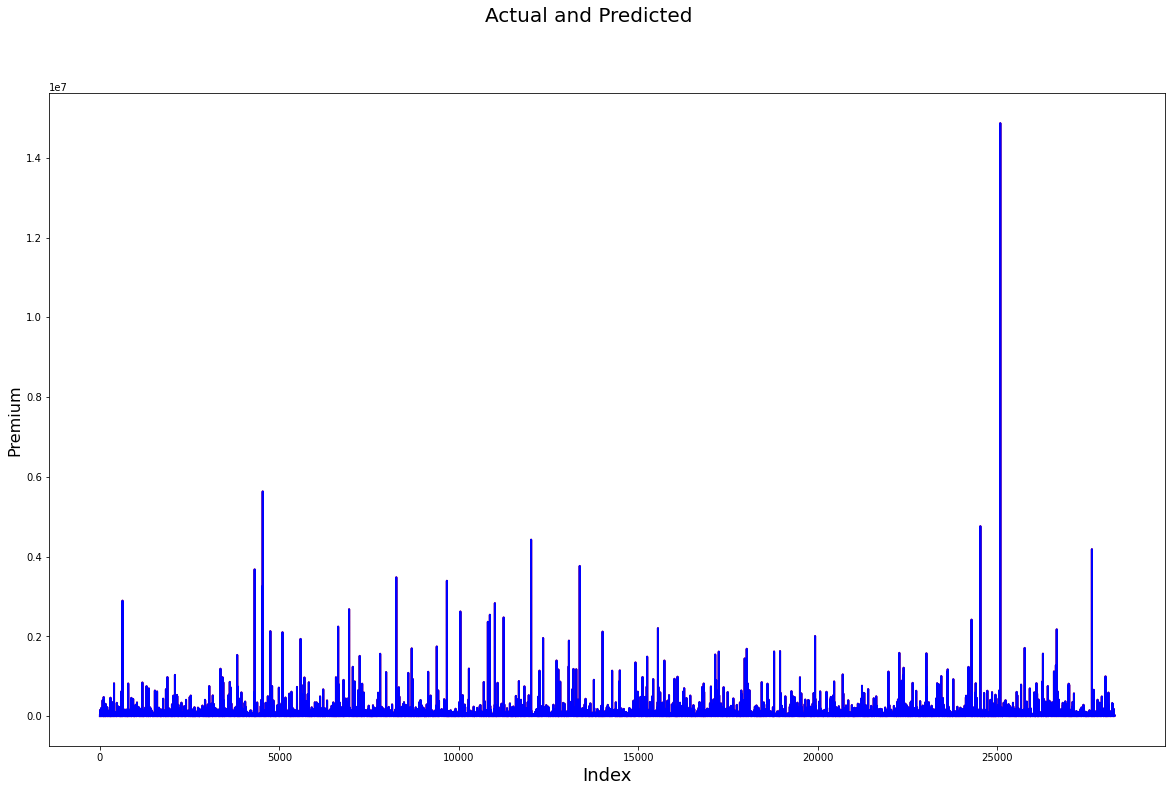

In [193]:
c = [i for i in range(1, 28267, 1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c, y_test, color = "red", linewidth = 2, linestyle = "-" )
plt.plot(c, y_predd, color = "blue", linewidth = 2, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Premium', fontsize = 16)

# Using Random Forest Regressor to build a model with x_train, x_test, y_train and y_test

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(x_train, y_train)
y_predicted = reg.predict(x_test)


In [195]:
print("mean square error: ", mean_squared_error(y_test, y_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, y_predicted))

mean square error:  1163389027.4169583
variance or r-squared:  0.9512547875265478


#### About 95% of the sample variation can be explained by using the multiple regression model. The closer it is to 100% the better the model.

In [196]:
sorted(zip(reg.feature_importances_, x_train.columns))

[(0.00043813085935123536, 'CreditScore'),
 (0.0005043960748922588, 'Term'),
 (0.0020964709050229732, 'APR'),
 (0.006935427753669506, 'FinChg'),
 (0.018528539886826706, 'Exposure'),
 (0.02737705389908064, 'Down'),
 (0.9441199806211567, 'Amt_Interest')]

In [197]:
feature_importances = pd.DataFrame(reg.feature_importances_, index = x_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Amt_Interest,0.944120
Down,0.027377
Exposure,0.018529
FinChg,0.006935
APR,0.002096
Term,0.000504
CreditScore,0.000438


#### Top five x variables influencing premium using Random Forest Regressor are, amount to be finaced plus interest, down payments, Exposure to risks, interst earned and loan APR

## Model Deployment using x_test

In [198]:
y_predicted = reg.predict(x_test)
y_predicted

array([ 1428.7465, 45820.2344,  1666.4899, ...,  2200.6853,  6350.845 ,
       16353.9092])

In [199]:
y_test.head()

137335     1426.65
49461     45666.60
19639      1664.00
128320    23032.53
62450      5862.65
Name: Premium, dtype: float64

In [200]:
y_predicted = pd.DataFrame(y_predicted, columns=['predicted Y'])
y_predicted.head(10)

,predicted Y
0,1428.7465
1,45820.2344
2,1666.4899
3,23014.8728
4,5848.8061
5,11689.1860
6,5228.2873
7,11593.2031
8,12100.8781
9,3314.1432


## Finally ...

In [201]:
x_test = x_test.reset_index(drop=True)
y_predicted = y_predicted.reset_index(drop=True)

data = x_test.join(y_predicted) 
data.head()

,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest,predicted Y
0,357.33,20.04,10,55.36,5,100.68,1170.00,1428.7465
1,9733.32,9.50,10,2245.83,1,1583.12,37516.40,45820.2344
2,525.00,21.25,9,0.00,3,103.18,1242.18,1666.4899
3,4606.51,8.50,10,1869.12,2,725.48,19151.50,23014.8728
4,1758.79,15.25,9,1143.64,2,265.19,4369.05,5848.8061


## Plotting Actual vrs Predicted

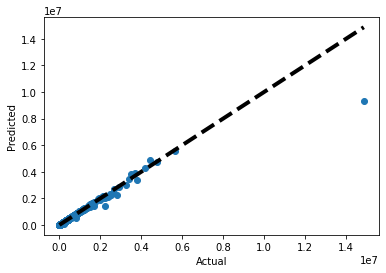

In [202]:
plt.subplots()
plt.scatter(y_test, y_predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Premium')

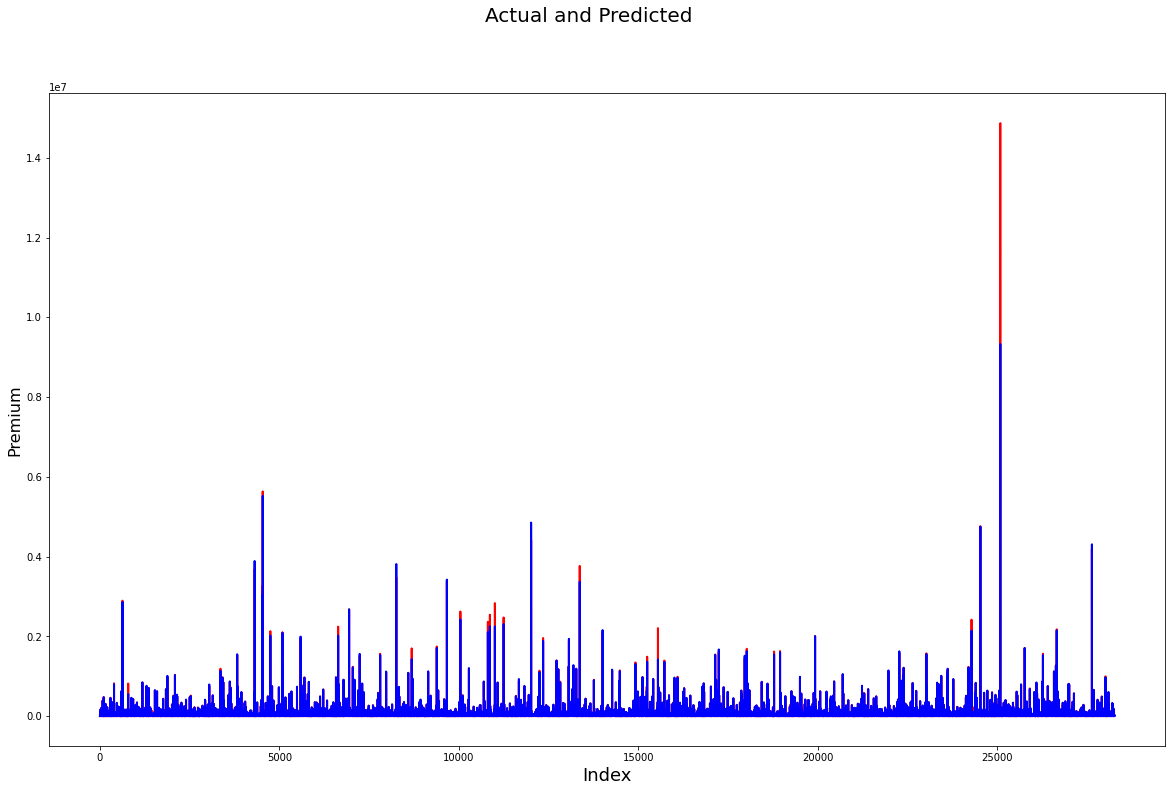

In [203]:
c = [i for i in range(1, 28267, 1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c, y_test, color = "red", linewidth = 2, linestyle = "-" )
plt.plot(c, y_predicted, color = "blue", linewidth = 2, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Premium', fontsize = 16)

# Recursive Feature Selection (RFE): Another Feature Selection Method

In [204]:
# Featured Selection
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_yl = rfe.fit(x_train,y_train)

print("Features sorted by their rank:")
print(sorted(zip([x_train for x_train in rfe.ranking_], x_train.columns)))

Features sorted by their rank:
[(1, 'Down'), (1, 'FinChg'), (2, 'Amt_Interest'), (3, 'APR'), (4, 'Term'), (5, 'CreditScore'), (6, 'Exposure')]


# Model with Multiple Regression using Statsmodels (Ordinary Least square)
### We select (1, 'Down'), (1, 'FinChg'), (2, 'Amt_Interest'), (3, 'APR')

In [205]:
ru = ols("Premium~Down+FinChg+Amt_Interest+APR",re)
run = ru.fit()
print(run.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.001e+34
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:40:06   Log-Likelihood:             1.9639e+06
No. Observations:               94218   AIC:                        -3.928e+06
Df Residuals:                   94213   BIC:                        -3.928e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.365e-11   2.19e-12    -10.783   

In [206]:
# Mean Square Residual
run.mse_resid

4.593475848824337e-20

## Model Deployment using x1 as the score test

In [207]:
# declaring X variables for deployment
x1 = re.drop(['Premium', 'Term', 'CreditScore', 'Exposure'], axis=1)

In [208]:
# Prediction
ols = run.predict(x1)
ols

7          23838.02
8           4699.38
12           996.64
14         12440.00
16          5368.00
            ...    
140565    152775.00
140567    281499.30
140568     53815.90
140572      3197.27
140573      1391.75
Length: 94218, dtype: float64

In [209]:
# comparing predicted to actual y variables
y.head()

7     23838.02
8      4699.38
12      996.64
14    12440.00
16     5368.00
Name: Premium, dtype: float64

In [210]:
# putting predicted y in a data frame
ols = pd.DataFrame(ols, columns=['predicted Y'])
ols.head(10)

,predicted Y
7,23838.02
8,4699.38
12,996.64
14,12440.00
16,5368.00
18,8025.00
22,4177.52
24,4446.10
26,3934.46
30,7922.00


## Finally ...

In [211]:
x1 = x1.reset_index(drop=True)
ols = ols.reset_index(drop=True)

data2 = x1.join(ols) 
data2.head()

,Down,APR,FinChg,Amt_Interest,predicted Y
0,6372.01,14.00,1049.02,18515.03,23838.02
1,1203.98,17.95,284.58,3779.98,4699.38
2,249.16,23.95,76.56,824.04,996.64
3,3266.00,14.00,598.90,9772.90,12440.00
4,1342.00,17.95,338.60,4364.60,5368.00


## Plotting Actual vrs Predicted

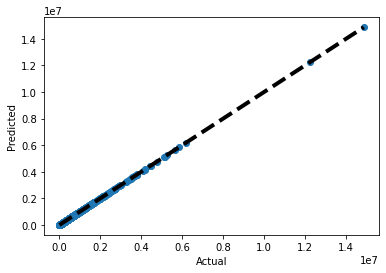

In [212]:
plt.subplots()
plt.scatter(y, ols)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Premium')

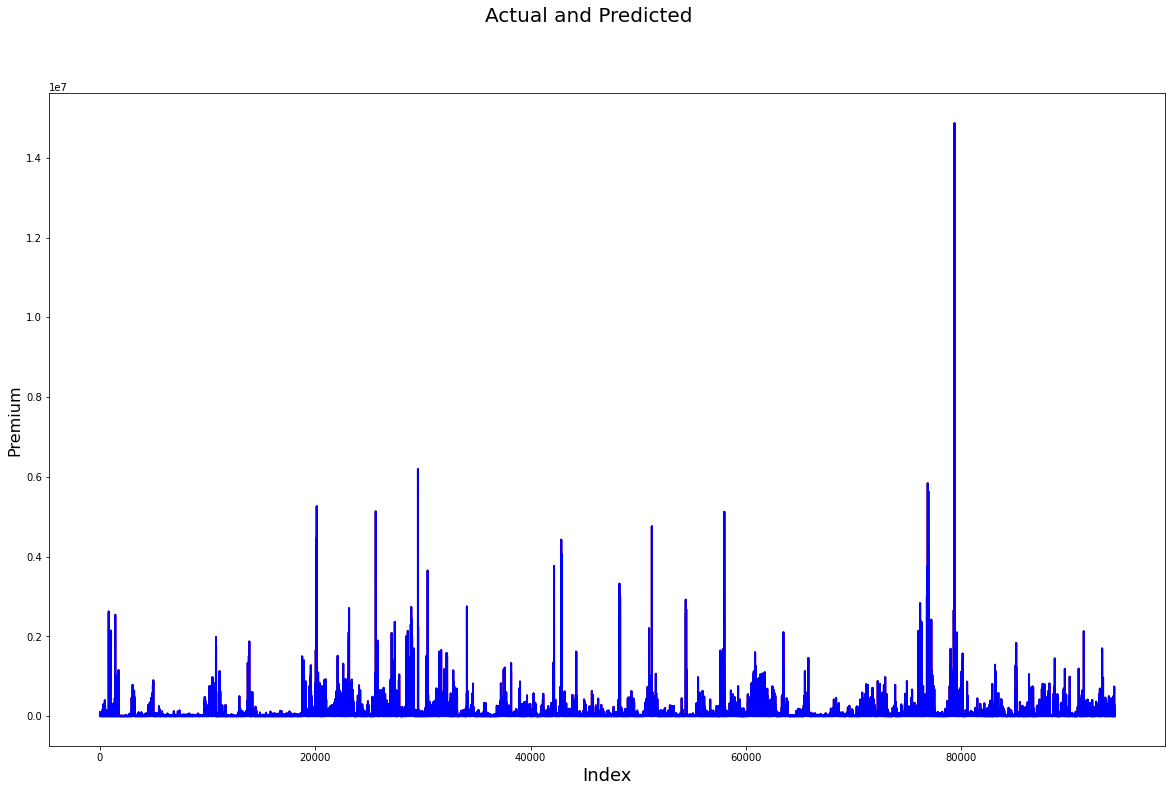

In [213]:
# Plotting Actual vrs Predicted
c = [i for i in range(1, 94219, 1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c, y, color = "red", linewidth = 2, linestyle = "-" )
plt.plot(c, ols, color = "blue", linewidth = 2, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Premium', fontsize = 16)

# Lasso regression (Regularization)

In [214]:
# Model development
model11 = linear_model.Lasso(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model11.fit(x, y)
model11_yl = model11.predict(x)
print('Coefficients: ', model11.coef_)
print("y-intercept ", model11.intercept_)

Coefficients:  [ 1.00000031e+00  0.00000000e+00 -0.00000000e+00  4.02989630e-06
  0.00000000e+00 -9.99777895e-01  9.99995509e-01]
y-intercept  -0.057381636503123445


In [215]:
# Finding coefficients
coef = ["%.3f" % i for i in model11.coef_]
xcolumns = [ i for i in x.columns ]
list(zip(xcolumns, coef))

[('Down', '1.000'),
 ('APR', '0.000'),
 ('Term', '-0.000'),
 ('Exposure', '0.000'),
 ('CreditScore', '0.000'),
 ('FinChg', '-1.000'),
 ('Amt_Interest', '1.000')]

In [216]:
# Model evaluation
print("mean square error: ", mean_squared_error(y, model11_yl))
print("variance or r-squared: ", explained_variance_score(y, model11_yl))

mean square error:  0.024397669951877712
variance or r-squared:  0.9999999999987502


## Model Deployment using x_test

In [217]:
# model prediction
la = model11.predict(x_test)
la

array([ 1426.61005921, 45666.73781746,  1663.96011908, ...,
        2201.80182514,  6360.97091523, 16485.99565287])

In [218]:
# comparing predicted to actual y test
y_test.head()

137335     1426.65
49461     45666.60
19639      1664.00
128320    23032.53
62450      5862.65
Name: Premium, dtype: float64

In [219]:
# Adding predicted y to the dataset
la = pd.DataFrame(la, columns=['predicted Y'])
la.head(10)

,predicted Y
0,1426.610059
1,45666.737817
2,1663.960119
3,23032.556702
4,5862.637050
5,11712.127829
6,5249.971597
7,11591.016938
8,12123.284851
9,3301.962463


In [220]:
#finally ...
x_test = x_test.reset_index(drop=True)
la = la.reset_index(drop=True)

data1 = x_test.join(la) 
data1.head()

,Down,APR,Term,Exposure,CreditScore,FinChg,Amt_Interest,predicted Y
0,357.33,20.04,10,55.36,5,100.68,1170.00,1426.610059
1,9733.32,9.50,10,2245.83,1,1583.12,37516.40,45666.737817
2,525.00,21.25,9,0.00,3,103.18,1242.18,1663.960119
3,4606.51,8.50,10,1869.12,2,725.48,19151.50,23032.556702
4,1758.79,15.25,9,1143.64,2,265.19,4369.05,5862.637050


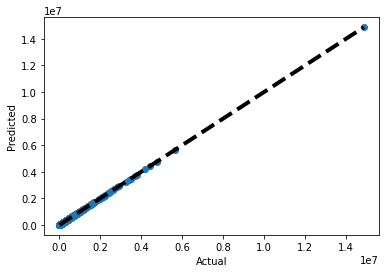

In [221]:
# Plotting predicted and actual y
plt.subplots()
plt.scatter(y_test, la )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Premium')

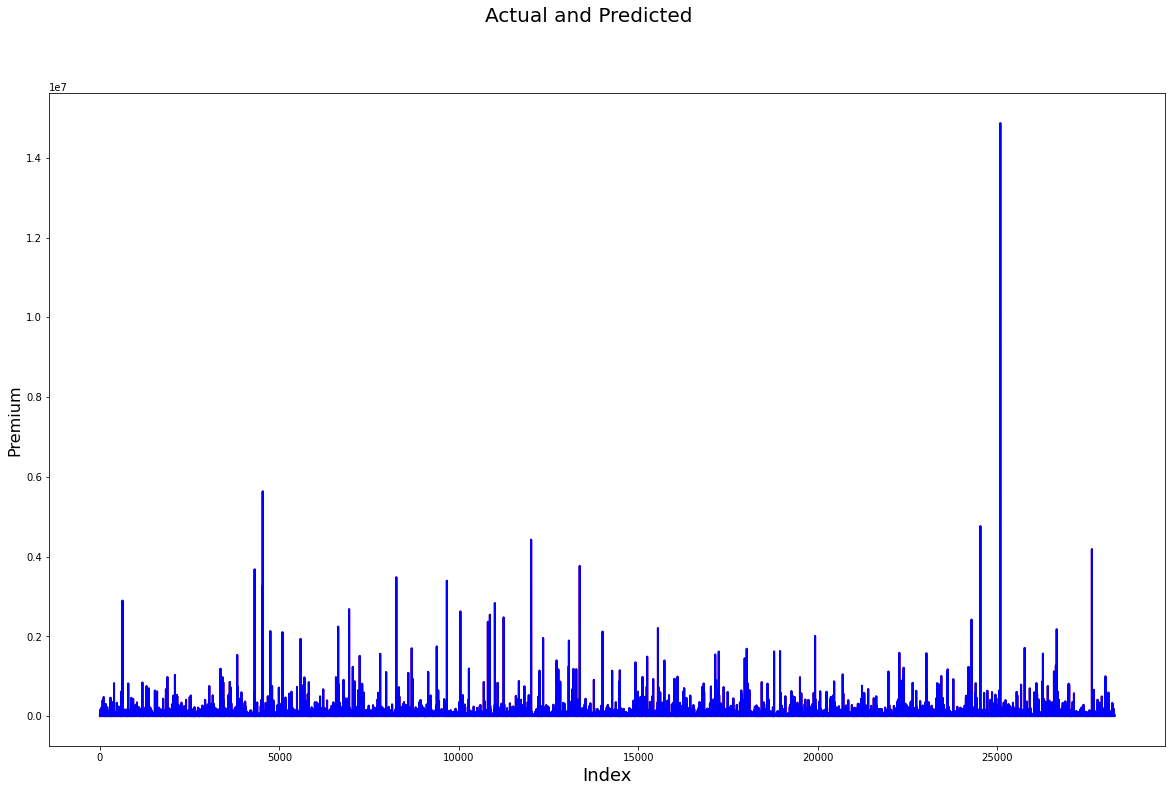

In [222]:
# comparing predicted and actual
c = [i for i in range(1, 28267, 1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c, y_test, color = "red", linewidth = 2, linestyle = "-" )
plt.plot(c, la, color = "blue", linewidth = 2, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Premium', fontsize = 16)

# Conclusion & Storytelling

### All three classification algorithms (Multiple Linear Regression,  Lasso Regression, Random forest regression, Ordinary Least Square) work well for this dataset. It was only Random Forest Regressor that gave us a lower r-square.
#### Certain predictors are found important in predicting premium. These predictors includes Down, FinChg, Amt_Interest, Exposure, and APR.
#### The combination of different predictors to form different datasets for modelling worked as well.
## Technical and Managerial Implications:
#### The best models had R-Square 1.0. The Prob(F-Statistics) is 0.00 signifying that all the predictor variables (p-values < the level of significance 0.05) used are statistically significant affirming the overall model statistically significant. The most important X variables as it could be seen through the correlation analysis done are Down, FinChg, Amt_Interest, Exposure. These four X variables are very important at predicting premium. From the correlation analysis done, APR and credit score had negative relationship with premium. That is the better the credict score, premium decreases and vice versa.
#### Also all variables used were satistically significant at 0.05 that is their p-values were less 0.05.
#### Managers to avoid a higer premium to help reduce borrower cancellation must encourage borrowers to put down down payments, build credict and reduced exposure to risk.

# CLUSTER ANALYSIS

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from random import sample
from math import isnan
from numpy.random import uniform

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Load data

In [224]:
df = pd.read_csv('data/clustering.csv')
df.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest
0,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,19.95,9,9,0.00,NaN,1454.94
1,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,10.65,10,10,442.96,NaN,9304.70
2,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,14.00,10,10,0.00,NaN,10647.70
3,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,14.50,9,9,0.00,NaN,6632.55
4,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,23.95,9,9,0.00,NaN,916.92


# Identifying data information

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Default_Charge        140574 non-null  float64
 1   Late_Charge           140574 non-null  float64
 2   NSF_Charge            140574 non-null  float64
 3   Premium               140574 non-null  float64
 4   Down                  140574 non-null  float64
 5   AmtFin                140574 non-null  float64
 6   FinChg                140574 non-null  float64
 7   APR                   140574 non-null  float64
 8   Term                  140574 non-null  int64  
 9   Payments_Rcvd         140574 non-null  int64  
 10  Exposure              140567 non-null  float64
 11  Borrower_CreditScore  94218 non-null   object 
 12  Amt_Interest          140574 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 13.9+ MB


# Identifying variables with missing values

In [226]:
df.isnull().sum()

Default_Charge              0
Late_Charge                 0
NSF_Charge                  0
Premium                     0
Down                        0
AmtFin                      0
FinChg                      0
APR                         0
Term                        0
Payments_Rcvd               0
Exposure                    7
Borrower_CreditScore    46356
Amt_Interest                0
dtype: int64

# Handlingmissing values for Exposure, we find the median and replace it with the null value.

In [227]:
df['Exposure'].median()

218.82

In [228]:
df = df.fillna({'Exposure': 218.82})

# Eliminating all null values

In [229]:
df = df.dropna()
df.isnull().sum()

Default_Charge          0
Late_Charge             0
NSF_Charge              0
Premium                 0
Down                    0
AmtFin                  0
FinChg                  0
APR                     0
Term                    0
Payments_Rcvd           0
Exposure                0
Borrower_CreditScore    0
Amt_Interest            0
dtype: int64

# Mappling or replacing credit score

In [230]:
df = df.replace({'Borrower_CreditScore': 'NS'}, {'Borrower_CreditScore': '6'})

# Convert object to number for CreditScore

In [231]:
df['Borrower_CreditScore'] = df['Borrower_CreditScore'].astype(int)
print(df.dtypes)

Default_Charge          float64
Late_Charge             float64
NSF_Charge              float64
Premium                 float64
Down                    float64
AmtFin                  float64
FinChg                  float64
APR                     float64
Term                      int64
Payments_Rcvd             int64
Exposure                float64
Borrower_CreditScore      int32
Amt_Interest            float64
dtype: object


# Variance test

In [232]:
df.var()

Default_Charge          2.580256e+01
Late_Charge             7.130180e+05
NSF_Charge              8.459968e+01
Premium                 1.952165e+10
Down                    1.006904e+09
AmtFin                  1.341433e+10
FinChg                  4.290684e+06
APR                     1.854235e+01
Term                    1.904360e+00
Payments_Rcvd           6.618053e+00
Exposure                8.748670e+08
Borrower_CreditScore    2.593401e+00
Amt_Interest            1.386569e+10
dtype: float64

# Drop amtfin column

In [233]:
df = df.drop(['AmtFin'], axis=1)
df.head(2)

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest
7,0.0,844.32,30.0,23838.02,6372.01,1049.02,14.00,10,10,1444.40,6,18515.03
8,0.0,15.69,0.0,4699.38,1203.98,284.58,17.95,10,1,124.58,3,3779.98


## Normalize data & Check variance again

In [234]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest
7,-0.003404,0.009631,0.021298,-0.000409,0.000233,0.002165,0.068127,0.011899,0.050803,-0.000214,0.536656,-0.000461
8,-0.003404,-0.001751,-0.000924,-0.001696,-0.001717,-0.002557,0.180984,0.011899,-0.324197,-0.000394,0.036656,-0.001530
12,-0.003404,-0.001967,-0.000924,-0.001945,-0.002077,-0.003842,0.352413,-0.016672,0.009136,-0.000411,-0.130011,-0.001745
14,-0.003404,-0.001967,-0.000924,-0.001176,-0.000939,-0.000615,0.068127,0.011899,0.050803,-0.000407,0.036656,-0.001095
16,-0.003404,-0.001667,-0.000924,-0.001651,-0.001665,-0.002223,0.180984,0.011899,0.050803,-0.000411,0.369989,-0.001488


In [235]:
# testing for variance
df_norm.var()

Default_Charge          0.000322
Late_Charge             0.000135
NSF_Charge              0.000046
Premium                 0.000088
Down                    0.000143
FinChg                  0.000164
APR                     0.015137
Term                    0.001555
Payments_Rcvd           0.011490
Exposure                0.000016
Borrower_CreditScore    0.072039
Amt_Interest            0.000073
dtype: float64

## Hopkins Statistics
##### The Hopkins statistics, is a statistic which gives a value which indicated the cluster tendency, in other words: how well the data can be clustered.
###### if the value is between {0.01,........,0.3}, the data is regularly spaced
###### if the value is around 0.5, it is random.
###### if the value is between {0.7,......,0.99}, it has a high tendency to cluster.

In [236]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _= nbrs.kneighbors(uniform(np.amin(X, axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _=nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H
        
        

In [237]:
hopkins(df_norm)

0.9971341036214143

#### The dataset  has a high tendency for cluster

# Determining an optimal value of k
## The "Elbow" Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

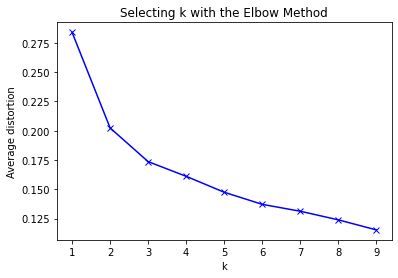

In [238]:
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = list(range(1, 10)) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method')

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

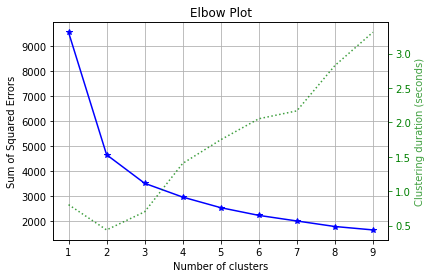

In [239]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=list(range(1, 10)))

#### The optimal K value is 4

# Clustering analysis (k = 4): Include "random_state=0"

In [240]:
#two clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [241]:
k_means.fit(df_norm)


KMeans(n_clusters=4, random_state=0)

In [242]:
#clustering results
k_means.labels_

array([2, 0, 1, ..., 1, 0, 2])

#### All 94218 borrowers now belong to a cluster. for example, person #1 is assigned into cluster 1. Remember we asked for 4 clusters. And they are labeled as cluster 0, cluster 1, cluster 2, and cluster 3.


# Cluster centroids or centers

In [243]:
k_means.cluster_centers_

array([[ 3.12779222e-03, -1.35081320e-03, -3.10011437e-04,
        -8.92088888e-04, -5.95541102e-04, -1.75054126e-03,
         3.72054114e-02, -5.43482276e-02, -2.68744374e-01,
        -2.55369223e-04, -8.73624564e-02, -8.68699603e-04],
       [-1.44171704e-03, -3.39495101e-04, -4.08435751e-04,
         3.31173247e-04,  2.48264790e-04,  5.88733547e-04,
        -1.69956511e-02,  7.16535987e-03,  3.63044134e-02,
         9.84064681e-05, -2.21616553e-01,  3.16543618e-04],
       [ 2.07285803e-03,  1.08211380e-03,  6.50178869e-04,
        -2.58300174e-04, -1.26082471e-04, -4.48968126e-04,
         1.88722594e-02, -6.43268342e-04, -6.52668206e-03,
        -1.04397736e-04,  4.39492657e-01, -2.59764665e-04],
       [-1.08861837e-04,  2.08700668e-04,  3.04090351e-04,
        -7.73282593e-05, -1.30113463e-04, -9.24845639e-05,
         2.63435232e-03,  5.89773972e-03,  3.01394780e-02,
        -6.07261009e-06,  7.65740129e-02, -5.95055394e-05]])

# To add cluster label into the dataset as a column

In [244]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,0
2,1
3,3
4,2


In [245]:
df2 = df.join(df1)
df2.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest,cluster
7,0.0,844.32,30.0,23838.02,6372.01,1049.02,14.00,10,10,1444.40,6,18515.03,3.0
8,0.0,15.69,0.0,4699.38,1203.98,284.58,17.95,10,1,124.58,3,3779.98,1.0
12,0.0,0.00,0.0,996.64,249.16,76.56,23.95,9,9,0.00,2,824.04,2.0
14,0.0,0.00,0.0,12440.00,3266.00,598.90,14.00,10,10,30.30,3,9772.90,2.0
16,0.0,21.82,0.0,5368.00,1342.00,338.60,17.95,10,10,0.00,5,4364.60,3.0


# Identifying data information 

In [246]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94218 entries, 7 to 140573
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Default_Charge        94218 non-null  float64
 1   Late_Charge           94218 non-null  float64
 2   NSF_Charge            94218 non-null  float64
 3   Premium               94218 non-null  float64
 4   Down                  94218 non-null  float64
 5   FinChg                94218 non-null  float64
 6   APR                   94218 non-null  float64
 7   Term                  94218 non-null  int64  
 8   Payments_Rcvd         94218 non-null  int64  
 9   Exposure              94218 non-null  float64
 10  Borrower_CreditScore  94218 non-null  int32  
 11  Amt_Interest          94218 non-null  float64
 12  cluster               62867 non-null  float64
dtypes: float64(10), int32(1), int64(2)
memory usage: 12.2 MB


# Checking for missing values in each column or variable

In [247]:
df2.isnull().sum()

Default_Charge              0
Late_Charge                 0
NSF_Charge                  0
Premium                     0
Down                        0
FinChg                      0
APR                         0
Term                        0
Payments_Rcvd               0
Exposure                    0
Borrower_CreditScore        0
Amt_Interest                0
cluster                 31351
dtype: int64

# Fixing missing values

In [248]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest,cluster
0,0.0,844.32,30.0,23838.02,6372.01,1049.02,14.00,10,10,1444.40,6,18515.03,2
1,0.0,15.69,0.0,4699.38,1203.98,284.58,17.95,10,1,124.58,3,3779.98,0
2,0.0,0.00,0.0,996.64,249.16,76.56,23.95,9,9,0.00,2,824.04,1
3,0.0,0.00,0.0,12440.00,3266.00,598.90,14.00,10,10,30.30,3,9772.90,3
4,0.0,21.82,0.0,5368.00,1342.00,338.60,17.95,10,10,0.00,5,4364.60,2


#### We can combine the cluster label into the original dataset. now the label is the last column in the new dataset

# Cluster with the highest number of borrowers

In [249]:
df2.groupby(['cluster']).size()

cluster
0     8097
1    42176
2    18438
3    25507
dtype: int64

#### Cluster 1 has the largest number of borrowers

# Profiling each cluster: Profiling is the key purpose of clustering analysis

In [250]:
 df2.groupby('cluster').mean()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Payments_Rcvd,Exposure,Borrower_CreditScore,Amt_Interest
cluster,,,,,,,,,,,,
0,1.839427,44.929654,0.830750,16676.284082,4181.952921,415.411912,12.909792,7.677782,2.325059,1139.101111,2.253427,12909.743073
1,0.555371,118.466457,0.696664,34842.988904,6411.561747,793.797827,11.021726,9.834788,9.652480,3727.485191,1.450517,29225.224984
2,1.549240,221.965703,2.125777,26079.538736,5419.758789,625.842993,12.276091,9.561015,8.624092,2243.798263,5.417019,21285.622940
3,0.934476,158.323431,1.657712,28760.860370,5407.163003,683.404489,11.709158,9.789313,9.501823,2962.329819,3.239503,24037.101856


## profiling thus comparing clusters
#### Cluster 0 consists of borrowers who have very high default Charge, very low late charge, low NFS charge, very low premium,very low down payment, very low interest income earned, very high APR, very low loan term, very low payments received, Very low exposure risk, good credit score and very low amount plus interest.
#### Cluster 1 consists of borrowers who have very low default Charge, low late charge, very low NFS charge, very high premium, very high down payment, very high interest income earned, low APR, very high loan term, very high payments received, Very high exposure risk, very good credit score and very high amount plus interest.
#### Cluster 2 consists of borrowers who have high default Charge, very high late charge, very high NFS charge, low premium, high down payment, low interest income earned, high APR, low loan term, low payments received, low exposure risk, worst credit score and  low amount plus interest.
#### Cluster 3 consists of borrowers who have low default Charge, high late charge, high NFS charge, high premium, low down payment, high interest income earned, low APR, high loan term, high payments received, high exposure risk, bad credit score and high amount plus interest.

# Visualisation of cluster and x variables

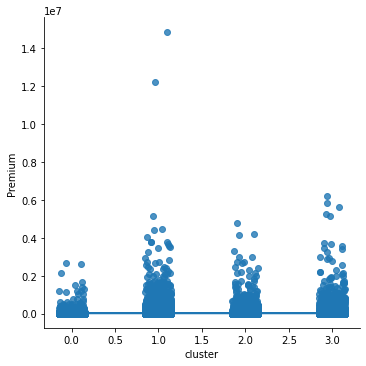

In [251]:
sns.lmplot("cluster", "Premium", df2, x_jitter=.15, y_jitter=.15)

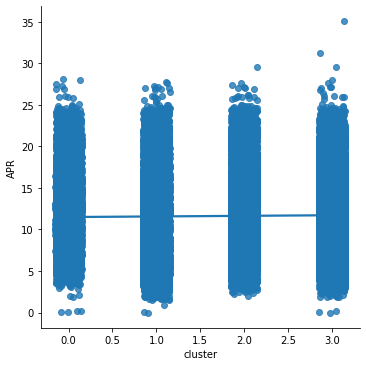

In [252]:
sns.lmplot("cluster", "APR", df2, x_jitter=.15, y_jitter=.15)

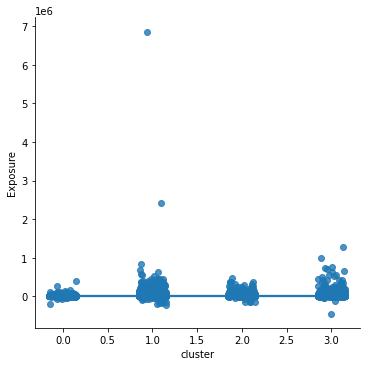

In [253]:
sns.lmplot("cluster", "Exposure", df2, x_jitter=.15, y_jitter=.15)

<AxesSubplot:>

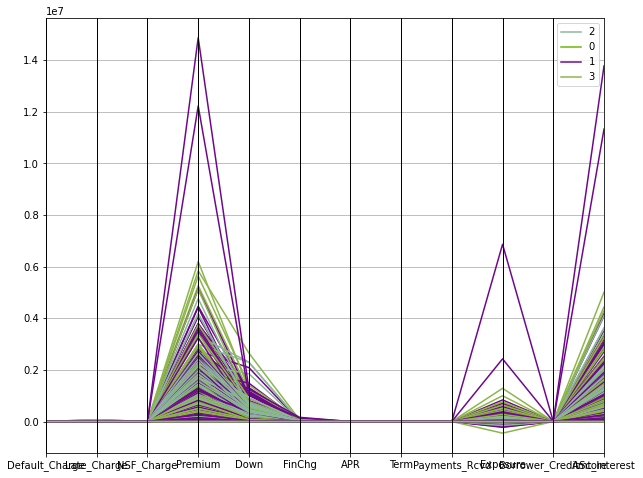

In [254]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,8))
parallel_coordinates(df2, 'cluster')

# Building a decision tree model with original dataset

In [255]:
# set X and y

y2 = df2['cluster']
X2 = df2.drop(['cluster'], axis=1)

In [256]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [257]:
# instantiate a decision tree model, and fit with X and y (no split validation needed)
model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

modelc = model.fit(X2, y2)
# check the accuracy on the training set
modelc.score(X2, y2)

0.9879959243456664

#### We have an accuracy of 99%

# Model Prediction

In [258]:
predicted_Y = modelc.predict(X2)
print(predicted_Y)

[2 0 1 ... 1 0 2]


# Decision Tree Plots

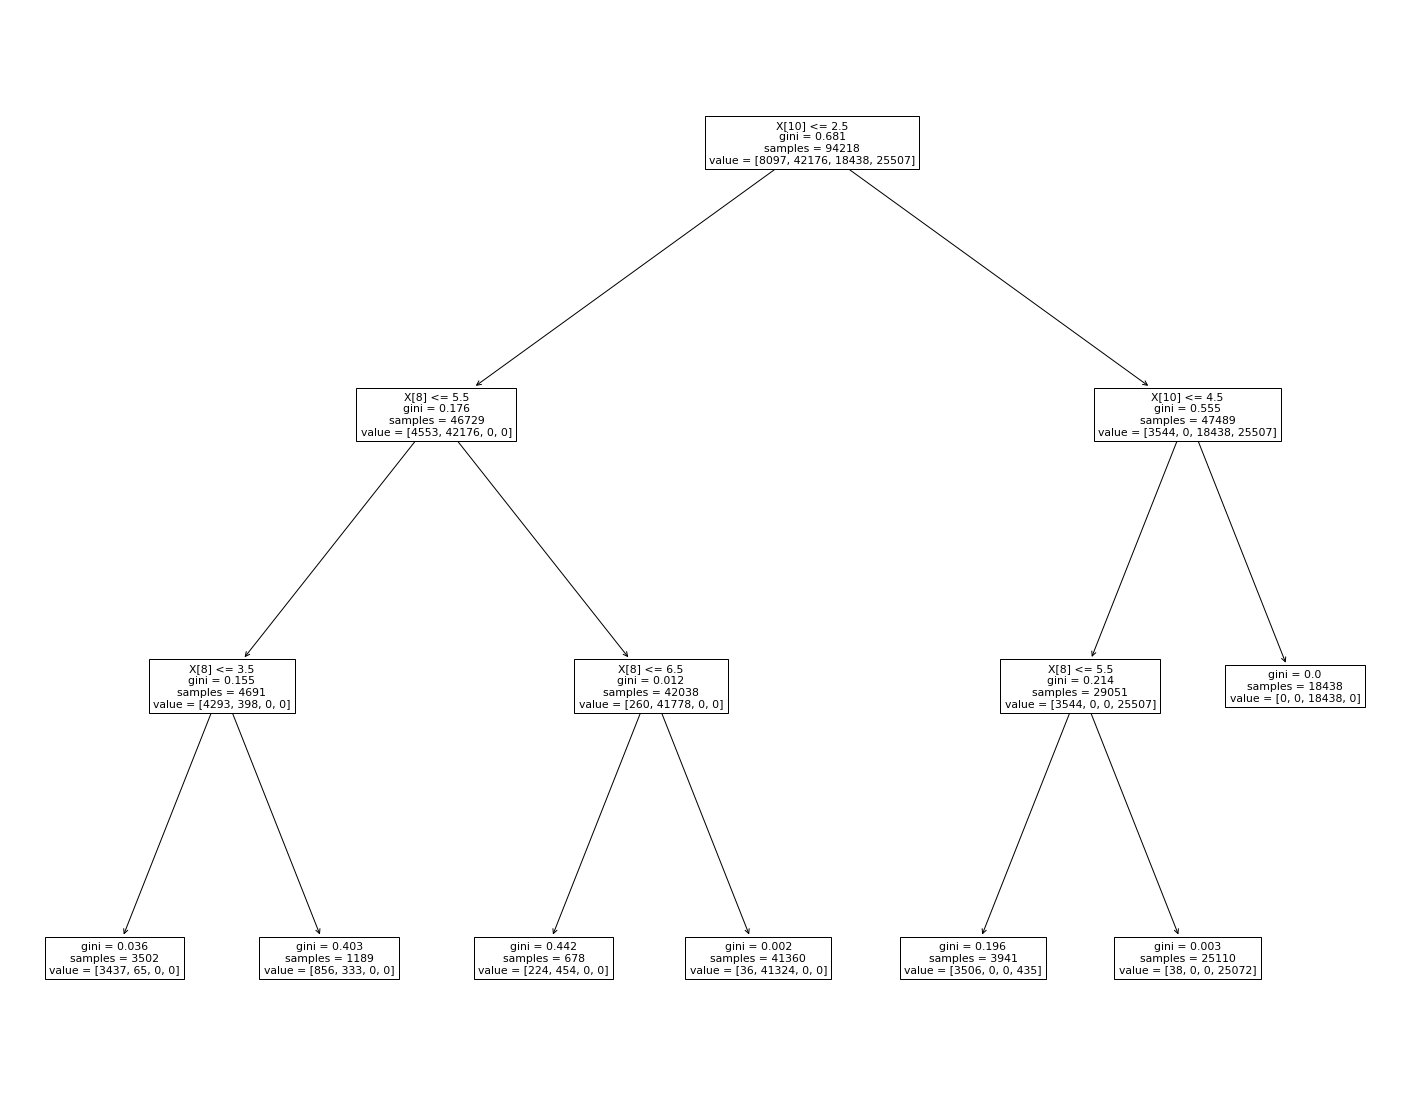

In [259]:
plt.figure(figsize=(25,20))
tree.plot_tree(modelc);

# Decision Tree

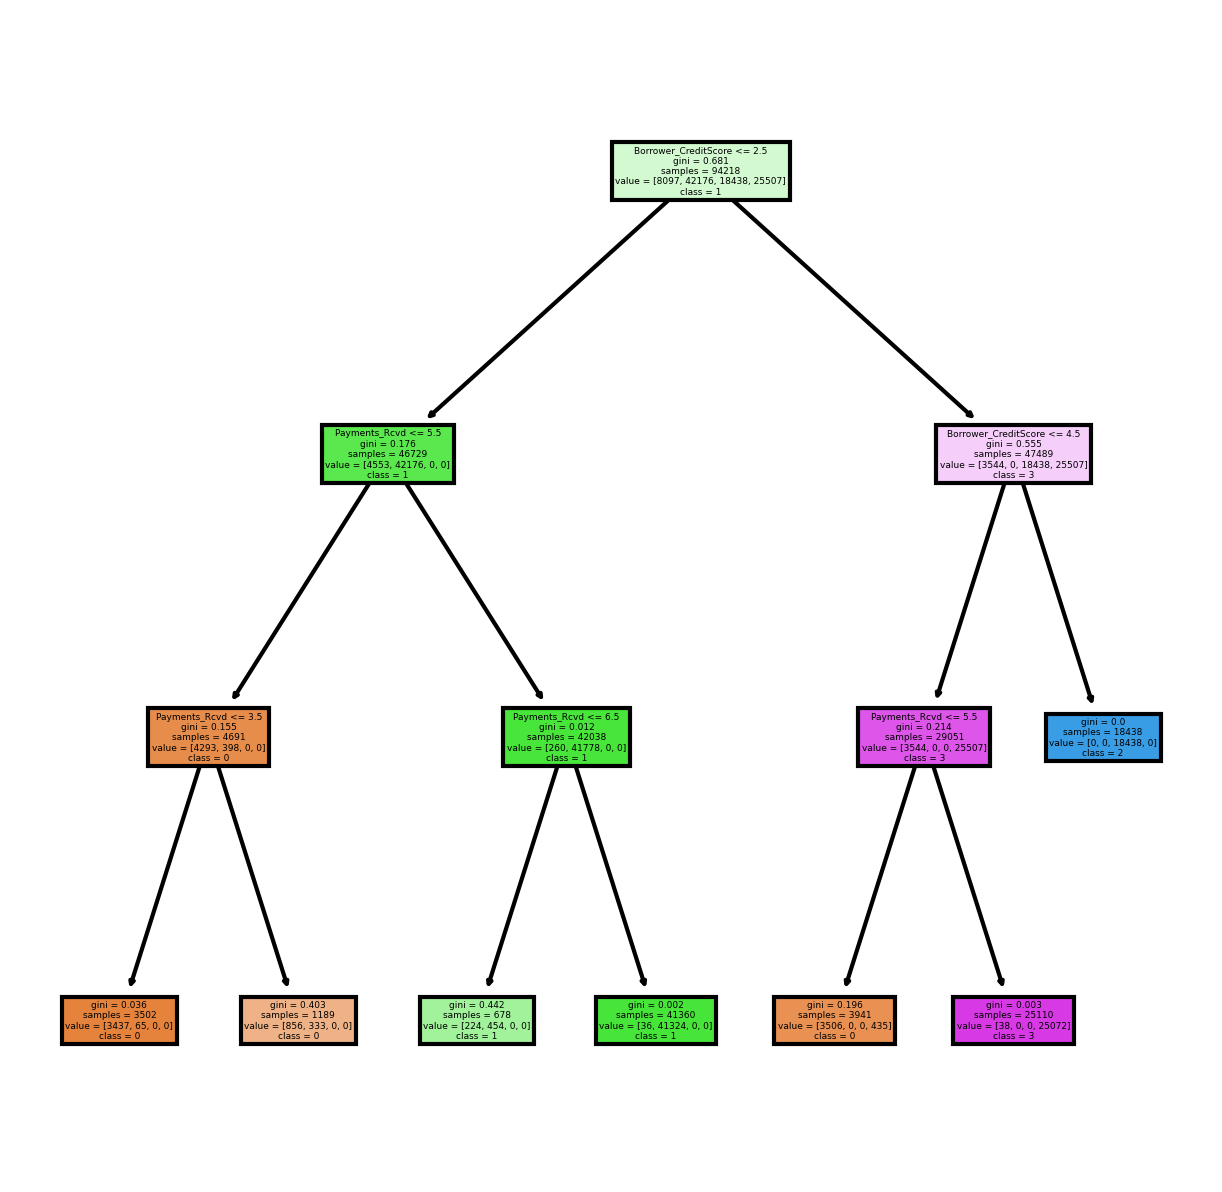

In [260]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = X2.columns, 
               class_names=['0','1','2','3'],    
               filled = True);

## Interpreting decision tree
#### Borrower credit score appears to be the single most influential factor. Many decision rules can be extracted. For example:
#### Credit score <= 2.5 means 42176 borrowers belongs to cluster 1. Thus,
#### All those 42176 borrowers and whose payment received is <= 5.5 (meaning less or equal to 5.5) belongs to cluster one.
#### All 4293 borrowers belongs to cluster 0 with payment_rcvd less than or equal to 3.5.

# Text Representation

In [261]:
text_representation = tree.export_text(modelc, feature_names=(list(X2.columns)))
print(text_representation)

|--- Borrower_CreditScore <= 2.50
|   |--- Payments_Rcvd <= 5.50
|   |   |--- Payments_Rcvd <= 3.50
|   |   |   |--- class: 0
|   |   |--- Payments_Rcvd >  3.50
|   |   |   |--- class: 0
|   |--- Payments_Rcvd >  5.50
|   |   |--- Payments_Rcvd <= 6.50
|   |   |   |--- class: 1
|   |   |--- Payments_Rcvd >  6.50
|   |   |   |--- class: 1
|--- Borrower_CreditScore >  2.50
|   |--- Borrower_CreditScore <= 4.50
|   |   |--- Payments_Rcvd <= 5.50
|   |   |   |--- class: 0
|   |   |--- Payments_Rcvd >  5.50
|   |   |   |--- class: 3
|   |--- Borrower_CreditScore >  4.50
|   |   |--- class: 2



#### From the text representation above, when credit score is less or equal to 2.5 and payment received  is less or equal to 5.50 at the same time payment received is  less or equal 3.5 then this borrower belongs to cluster 0 but when payment received is greater 5.5 and at the same time payment received less or equal to 6.50 then the borrower belongs to cluster 1.

# Building Random forest model

In [262]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
clf=clf.fit(X2, y2)
clf.score(X2,y2)

1.0

#### We have a 100% accuracy

# Which variables are considered least important in this clustering analysis?

In [263]:
pd.DataFrame(clf.feature_importances_, index = X2.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
Borrower_CreditScore,0.794157
Payments_Rcvd,0.134302
Term,0.021342
Late_Charge,0.008351
FinChg,0.007420
Amt_Interest,0.007013
APR,0.006657
Exposure,0.006287
Premium,0.006139
Down,0.005526


#### These are the top 5 important variables in ascending order
#### Borrower_CreditScore 0.803053
#### Payments_Rcvd	0.134487
#### Term	0.021568
#### Late_Charge	0.006383
#### FinChg	0.006085
#### These variables play a major role in the clustering analysis.

# SUMMARY AND RECOMMENDATIONS

#### Our quest is to better understand why a loan cancels before its maturity date. The analysis conducted shows a major influence by the predictors. The exploratory analysis showed high correlation between the dependent varaible (y) and some independent variables. For instance, Terms of payment had a negative relationship with cancelled. Thus, as cancelled increases, terms of payment decreases and vice versa. In real world terms, borrowers who had long terms of payment, are likely to payoff their loan since their loan amount will be small.. Another phenominon seen was the positive relationship between cancelled and late charge. This relationship means that, as late charges increase, cancelled increases. In the real world situation, late charges increases payments that is borrowers pay more than what they are supposed to pay which can lead to cancellation of loans.
#### The two hypothesis stated above at the beginning of the analysis is statistically significant in determining the prediction of borrowers who will cancl their loans in future. These predictors, APR, premium, credit score play a major role in the decision to cancel a loan or not by borrowers. Late charges has a positive relationship between loan cancellations. The higher the late charge, the more likely borrowers will cancel their loans before the maturity date. Down payments also had a negative relationship with cancellations. The higher the down payments, the less likely borrowes will cancel their loans.


## Recommendations
#### Mangers of Premium Financing Company to solve the cancellation issue must take into account the APR given to borrowers. From our analysis, borrowers who cancelled their loans before maturity date had a higher APR. Even though there is a domino effect when it come to the relationship between credit score and APR (low credit or no credit score means high APR), Manager can use another meansure to determine the APR. For instance, a borrower with a no credit score but works to earn constant salary at the end of every month can be given a less APR to encourage him or her to adhere to loan terms.
#### Managers must give less late charges to borrowers who do not often delay payments. High late charges from our analysis proved that, borrowers are more likely to cancel their loans before the maturity date. Therefore, Manager to help prevent future cancellations can reduce late charges.
#### Down payments are ways the borrowers get to reduce the loan. From the analysis, borrowers with low down payments had the highest cancellations. For managers to reduce the level of cancellations, they must encourage borrowers to make higher down payments. By so doing, the loan amount will be small to help borrowers payoff. 
#### From our cluster analysis, managers must target cluster 0 and cluster 2 if they maximization of profit is their priority. The two clusters or groups of borrowers have very good credit score, low exposure to risk, late charges etc which means, these borrowers are more likely not to cancel their loans. Cluster 1 and cluster 3 are the groups with more cancellations, therefore managers must apply the reduction in APR, increases terms of payments, reduced late charges for borrowers who normally do not delay payments etc to help reduce cancellation of loans.
